In [6]:
import numpy as np
import cv2

# Variables That You Can Adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
# numSecRecorded = 150
# fps = 20
numFrames2Read = 7500 #17805 # 15 mins. a little less than fps * numSecRecorded.. #1900

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
EWLVoltage = [] # 5. EWL Voltage level
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

# frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    voltageStepAr = pixelValues[-20:-16]
    voltageStep = voltageStepAr[0] + pow(16, 2) * voltageStepAr[1] + pow(16, 4) * voltageStepAr[2] + pow(16, 6) * voltageStepAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    EWLVoltage.append(voltageStep) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "EWL Voltage: ", voltageStep, "\t",
#          "Main Buffers Ahead: ", pixelValues[-28], "\t",
#          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  99 	 Main Timestamp:  99 	 EWL Voltage:  38 	 

Frame Number:  1 	 Interrupt Timestamp:  149 	 Main Timestamp:  150 	 EWL Voltage:  38 	 

Frame Number:  2 	 Interrupt Timestamp:  200 	 Main Timestamp:  200 	 EWL Voltage:  38 	 

Frame Number:  3 	 Interrupt Timestamp:  250 	 Main Timestamp:  250 	 EWL Voltage:  38 	 

Frame Number:  4 	 Interrupt Timestamp:  301 	 Main Timestamp:  301 	 EWL Voltage:  38 	 

Frame Number:  5 	 Interrupt Timestamp:  351 	 Main Timestamp:  351 	 EWL Voltage:  38 	 

Frame Number:  6 	 Interrupt Timestamp:  402 	 Main Timestamp:  402 	 EWL Voltage:  38 	 

Frame Number:  7 	 Interrupt Timestamp:  452 	 Main Timestamp:  452 	 EWL Voltage:  38 	 

Frame Number:  8 	 Interrupt Timestamp:  503 	 Main Timestamp:  503 	 EWL Voltage:  38 	 

Frame Number:  9 	 Interrupt Timestamp:  553 	 Main Timestamp:  553 	 EWL Voltage:  38 	 

Frame Number:  10 	 Interrupt Timestamp:  603 	 Main Timestamp:  603 	 EWL Voltage:  38 	 



Frame Number:  94 	 Interrupt Timestamp:  4841 	 Main Timestamp:  4841 	 EWL Voltage:  38 	 

Frame Number:  95 	 Interrupt Timestamp:  4891 	 Main Timestamp:  4891 	 EWL Voltage:  38 	 

Frame Number:  96 	 Interrupt Timestamp:  4941 	 Main Timestamp:  4941 	 EWL Voltage:  38 	 

Frame Number:  97 	 Interrupt Timestamp:  4992 	 Main Timestamp:  4992 	 EWL Voltage:  38 	 

Frame Number:  98 	 Interrupt Timestamp:  5042 	 Main Timestamp:  5042 	 EWL Voltage:  38 	 

Frame Number:  99 	 Interrupt Timestamp:  5093 	 Main Timestamp:  5093 	 EWL Voltage:  38 	 

Frame Number:  100 	 Interrupt Timestamp:  5143 	 Main Timestamp:  5143 	 EWL Voltage:  38 	 

Frame Number:  101 	 Interrupt Timestamp:  5194 	 Main Timestamp:  5194 	 EWL Voltage:  38 	 

Frame Number:  102 	 Interrupt Timestamp:  5244 	 Main Timestamp:  5244 	 EWL Voltage:  38 	 

Frame Number:  103 	 Interrupt Timestamp:  5294 	 Main Timestamp:  5295 	 EWL Voltage:  38 	 

Frame Number:  104 	 Interrupt Timestamp:  5345 	 Main T

Frame Number:  196 	 Interrupt Timestamp:  9986 	 Main Timestamp:  9986 	 EWL Voltage:  38 	 

Frame Number:  197 	 Interrupt Timestamp:  10036 	 Main Timestamp:  10036 	 EWL Voltage:  38 	 

Frame Number:  198 	 Interrupt Timestamp:  10086 	 Main Timestamp:  10086 	 EWL Voltage:  38 	 

Frame Number:  199 	 Interrupt Timestamp:  10137 	 Main Timestamp:  10137 	 EWL Voltage:  38 	 

Frame Number:  200 	 Interrupt Timestamp:  10187 	 Main Timestamp:  10188 	 EWL Voltage:  41 	 

Frame Number:  201 	 Interrupt Timestamp:  10238 	 Main Timestamp:  10238 	 EWL Voltage:  41 	 

Frame Number:  202 	 Interrupt Timestamp:  10288 	 Main Timestamp:  10288 	 EWL Voltage:  41 	 

Frame Number:  203 	 Interrupt Timestamp:  10339 	 Main Timestamp:  10339 	 EWL Voltage:  41 	 

Frame Number:  204 	 Interrupt Timestamp:  10389 	 Main Timestamp:  10389 	 EWL Voltage:  41 	 

Frame Number:  205 	 Interrupt Timestamp:  10439 	 Main Timestamp:  10439 	 EWL Voltage:  41 	 

Frame Number:  206 	 Interrupt T

Frame Number:  296 	 Interrupt Timestamp:  15030 	 Main Timestamp:  15030 	 EWL Voltage:  41 	 

Frame Number:  297 	 Interrupt Timestamp:  15080 	 Main Timestamp:  15080 	 EWL Voltage:  41 	 

Frame Number:  298 	 Interrupt Timestamp:  15131 	 Main Timestamp:  15131 	 EWL Voltage:  41 	 

Frame Number:  299 	 Interrupt Timestamp:  15181 	 Main Timestamp:  15181 	 EWL Voltage:  41 	 

Frame Number:  300 	 Interrupt Timestamp:  15231 	 Main Timestamp:  15231 	 EWL Voltage:  41 	 

Frame Number:  301 	 Interrupt Timestamp:  15282 	 Main Timestamp:  15282 	 EWL Voltage:  41 	 

Frame Number:  302 	 Interrupt Timestamp:  15332 	 Main Timestamp:  15332 	 EWL Voltage:  41 	 

Frame Number:  303 	 Interrupt Timestamp:  15383 	 Main Timestamp:  15383 	 EWL Voltage:  41 	 

Frame Number:  304 	 Interrupt Timestamp:  15433 	 Main Timestamp:  15433 	 EWL Voltage:  41 	 

Frame Number:  305 	 Interrupt Timestamp:  15484 	 Main Timestamp:  15484 	 EWL Voltage:  41 	 

Frame Number:  306 	 Interrupt

Frame Number:  395 	 Interrupt Timestamp:  20023 	 Main Timestamp:  20023 	 EWL Voltage:  41 	 

Frame Number:  396 	 Interrupt Timestamp:  20074 	 Main Timestamp:  20074 	 EWL Voltage:  41 	 

Frame Number:  397 	 Interrupt Timestamp:  20124 	 Main Timestamp:  20124 	 EWL Voltage:  41 	 

Frame Number:  398 	 Interrupt Timestamp:  20175 	 Main Timestamp:  20175 	 EWL Voltage:  41 	 

Frame Number:  399 	 Interrupt Timestamp:  20225 	 Main Timestamp:  20225 	 EWL Voltage:  41 	 

Frame Number:  400 	 Interrupt Timestamp:  20276 	 Main Timestamp:  20276 	 EWL Voltage:  44 	 

Frame Number:  401 	 Interrupt Timestamp:  20326 	 Main Timestamp:  20326 	 EWL Voltage:  44 	 

Frame Number:  402 	 Interrupt Timestamp:  20376 	 Main Timestamp:  20376 	 EWL Voltage:  44 	 

Frame Number:  403 	 Interrupt Timestamp:  20427 	 Main Timestamp:  20427 	 EWL Voltage:  44 	 

Frame Number:  404 	 Interrupt Timestamp:  20477 	 Main Timestamp:  20477 	 EWL Voltage:  44 	 

Frame Number:  405 	 Interrupt

Frame Number:  486 	 Interrupt Timestamp:  24613 	 Main Timestamp:  24613 	 EWL Voltage:  44 	 

Frame Number:  487 	 Interrupt Timestamp:  24664 	 Main Timestamp:  24664 	 EWL Voltage:  44 	 

Frame Number:  488 	 Interrupt Timestamp:  24714 	 Main Timestamp:  24714 	 EWL Voltage:  44 	 

Frame Number:  489 	 Interrupt Timestamp:  24765 	 Main Timestamp:  24765 	 EWL Voltage:  44 	 

Frame Number:  490 	 Interrupt Timestamp:  24815 	 Main Timestamp:  24815 	 EWL Voltage:  44 	 

Frame Number:  491 	 Interrupt Timestamp:  24866 	 Main Timestamp:  24866 	 EWL Voltage:  44 	 

Frame Number:  492 	 Interrupt Timestamp:  24916 	 Main Timestamp:  24916 	 EWL Voltage:  44 	 

Frame Number:  493 	 Interrupt Timestamp:  24967 	 Main Timestamp:  24967 	 EWL Voltage:  44 	 

Frame Number:  494 	 Interrupt Timestamp:  25017 	 Main Timestamp:  25017 	 EWL Voltage:  44 	 

Frame Number:  495 	 Interrupt Timestamp:  25067 	 Main Timestamp:  25067 	 EWL Voltage:  44 	 

Frame Number:  496 	 Interrupt

Frame Number:  571 	 Interrupt Timestamp:  28901 	 Main Timestamp:  28901 	 EWL Voltage:  44 	 

Frame Number:  572 	 Interrupt Timestamp:  28951 	 Main Timestamp:  28951 	 EWL Voltage:  44 	 

Frame Number:  573 	 Interrupt Timestamp:  29002 	 Main Timestamp:  29002 	 EWL Voltage:  44 	 

Frame Number:  574 	 Interrupt Timestamp:  29052 	 Main Timestamp:  29052 	 EWL Voltage:  44 	 

Frame Number:  575 	 Interrupt Timestamp:  29103 	 Main Timestamp:  29103 	 EWL Voltage:  44 	 

Frame Number:  576 	 Interrupt Timestamp:  29153 	 Main Timestamp:  29153 	 EWL Voltage:  44 	 

Frame Number:  577 	 Interrupt Timestamp:  29204 	 Main Timestamp:  29204 	 EWL Voltage:  44 	 

Frame Number:  578 	 Interrupt Timestamp:  29254 	 Main Timestamp:  29254 	 EWL Voltage:  44 	 

Frame Number:  579 	 Interrupt Timestamp:  29304 	 Main Timestamp:  29305 	 EWL Voltage:  44 	 

Frame Number:  580 	 Interrupt Timestamp:  29355 	 Main Timestamp:  29355 	 EWL Voltage:  44 	 

Frame Number:  581 	 Interrupt

Frame Number:  667 	 Interrupt Timestamp:  33743 	 Main Timestamp:  33743 	 EWL Voltage:  47 	 

Frame Number:  668 	 Interrupt Timestamp:  33794 	 Main Timestamp:  33794 	 EWL Voltage:  47 	 

Frame Number:  669 	 Interrupt Timestamp:  33844 	 Main Timestamp:  33844 	 EWL Voltage:  47 	 

Frame Number:  670 	 Interrupt Timestamp:  33895 	 Main Timestamp:  33895 	 EWL Voltage:  47 	 

Frame Number:  671 	 Interrupt Timestamp:  33945 	 Main Timestamp:  33945 	 EWL Voltage:  47 	 

Frame Number:  672 	 Interrupt Timestamp:  33996 	 Main Timestamp:  33996 	 EWL Voltage:  47 	 

Frame Number:  673 	 Interrupt Timestamp:  34046 	 Main Timestamp:  34046 	 EWL Voltage:  47 	 

Frame Number:  674 	 Interrupt Timestamp:  34096 	 Main Timestamp:  34096 	 EWL Voltage:  47 	 

Frame Number:  675 	 Interrupt Timestamp:  34147 	 Main Timestamp:  34147 	 EWL Voltage:  47 	 

Frame Number:  676 	 Interrupt Timestamp:  34197 	 Main Timestamp:  34197 	 EWL Voltage:  47 	 

Frame Number:  677 	 Interrupt

Frame Number:  764 	 Interrupt Timestamp:  38636 	 Main Timestamp:  38636 	 EWL Voltage:  47 	 

Frame Number:  765 	 Interrupt Timestamp:  38687 	 Main Timestamp:  38687 	 EWL Voltage:  47 	 

Frame Number:  766 	 Interrupt Timestamp:  38737 	 Main Timestamp:  38737 	 EWL Voltage:  47 	 

Frame Number:  767 	 Interrupt Timestamp:  38787 	 Main Timestamp:  38787 	 EWL Voltage:  47 	 

Frame Number:  768 	 Interrupt Timestamp:  38838 	 Main Timestamp:  38838 	 EWL Voltage:  47 	 

Frame Number:  769 	 Interrupt Timestamp:  38888 	 Main Timestamp:  38888 	 EWL Voltage:  47 	 

Frame Number:  770 	 Interrupt Timestamp:  38939 	 Main Timestamp:  38939 	 EWL Voltage:  47 	 

Frame Number:  771 	 Interrupt Timestamp:  38989 	 Main Timestamp:  38989 	 EWL Voltage:  47 	 

Frame Number:  772 	 Interrupt Timestamp:  39040 	 Main Timestamp:  39040 	 EWL Voltage:  47 	 

Frame Number:  773 	 Interrupt Timestamp:  39090 	 Main Timestamp:  39090 	 EWL Voltage:  47 	 

Frame Number:  774 	 Interrupt

Frame Number:  862 	 Interrupt Timestamp:  43579 	 Main Timestamp:  43579 	 EWL Voltage:  50 	 

Frame Number:  863 	 Interrupt Timestamp:  43630 	 Main Timestamp:  43630 	 EWL Voltage:  50 	 

Frame Number:  864 	 Interrupt Timestamp:  43680 	 Main Timestamp:  43680 	 EWL Voltage:  50 	 

Frame Number:  865 	 Interrupt Timestamp:  43731 	 Main Timestamp:  43731 	 EWL Voltage:  50 	 

Frame Number:  866 	 Interrupt Timestamp:  43781 	 Main Timestamp:  43781 	 EWL Voltage:  50 	 

Frame Number:  867 	 Interrupt Timestamp:  43832 	 Main Timestamp:  43832 	 EWL Voltage:  50 	 

Frame Number:  868 	 Interrupt Timestamp:  43882 	 Main Timestamp:  43882 	 EWL Voltage:  50 	 

Frame Number:  869 	 Interrupt Timestamp:  43932 	 Main Timestamp:  43932 	 EWL Voltage:  50 	 

Frame Number:  870 	 Interrupt Timestamp:  43983 	 Main Timestamp:  43983 	 EWL Voltage:  50 	 

Frame Number:  871 	 Interrupt Timestamp:  44033 	 Main Timestamp:  44033 	 EWL Voltage:  50 	 

Frame Number:  872 	 Interrupt

Frame Number:  949 	 Interrupt Timestamp:  47968 	 Main Timestamp:  47968 	 EWL Voltage:  50 	 

Frame Number:  950 	 Interrupt Timestamp:  48018 	 Main Timestamp:  48018 	 EWL Voltage:  50 	 

Frame Number:  951 	 Interrupt Timestamp:  48069 	 Main Timestamp:  48069 	 EWL Voltage:  50 	 

Frame Number:  952 	 Interrupt Timestamp:  48119 	 Main Timestamp:  48119 	 EWL Voltage:  50 	 

Frame Number:  953 	 Interrupt Timestamp:  48170 	 Main Timestamp:  48170 	 EWL Voltage:  50 	 

Frame Number:  954 	 Interrupt Timestamp:  48220 	 Main Timestamp:  48220 	 EWL Voltage:  50 	 

Frame Number:  955 	 Interrupt Timestamp:  48270 	 Main Timestamp:  48270 	 EWL Voltage:  50 	 

Frame Number:  956 	 Interrupt Timestamp:  48321 	 Main Timestamp:  48321 	 EWL Voltage:  50 	 

Frame Number:  957 	 Interrupt Timestamp:  48371 	 Main Timestamp:  48371 	 EWL Voltage:  50 	 

Frame Number:  958 	 Interrupt Timestamp:  48422 	 Main Timestamp:  48422 	 EWL Voltage:  50 	 

Frame Number:  959 	 Interrupt

Frame Number:  1038 	 Interrupt Timestamp:  52457 	 Main Timestamp:  52457 	 EWL Voltage:  53 	 

Frame Number:  1039 	 Interrupt Timestamp:  52507 	 Main Timestamp:  52507 	 EWL Voltage:  53 	 

Frame Number:  1040 	 Interrupt Timestamp:  52558 	 Main Timestamp:  52558 	 EWL Voltage:  53 	 

Frame Number:  1041 	 Interrupt Timestamp:  52608 	 Main Timestamp:  52608 	 EWL Voltage:  53 	 

Frame Number:  1042 	 Interrupt Timestamp:  52659 	 Main Timestamp:  52659 	 EWL Voltage:  53 	 

Frame Number:  1043 	 Interrupt Timestamp:  52709 	 Main Timestamp:  52709 	 EWL Voltage:  53 	 

Frame Number:  1044 	 Interrupt Timestamp:  52760 	 Main Timestamp:  52760 	 EWL Voltage:  53 	 

Frame Number:  1045 	 Interrupt Timestamp:  52810 	 Main Timestamp:  52810 	 EWL Voltage:  53 	 

Frame Number:  1046 	 Interrupt Timestamp:  52861 	 Main Timestamp:  52861 	 EWL Voltage:  53 	 

Frame Number:  1047 	 Interrupt Timestamp:  52911 	 Main Timestamp:  52911 	 EWL Voltage:  53 	 

Frame Number:  1048 

Frame Number:  1132 	 Interrupt Timestamp:  57198 	 Main Timestamp:  57199 	 EWL Voltage:  53 	 

Frame Number:  1133 	 Interrupt Timestamp:  57249 	 Main Timestamp:  57249 	 EWL Voltage:  53 	 

Frame Number:  1134 	 Interrupt Timestamp:  57299 	 Main Timestamp:  57299 	 EWL Voltage:  53 	 

Frame Number:  1135 	 Interrupt Timestamp:  57350 	 Main Timestamp:  57350 	 EWL Voltage:  53 	 

Frame Number:  1136 	 Interrupt Timestamp:  57400 	 Main Timestamp:  57400 	 EWL Voltage:  53 	 

Frame Number:  1137 	 Interrupt Timestamp:  57451 	 Main Timestamp:  57451 	 EWL Voltage:  53 	 

Frame Number:  1138 	 Interrupt Timestamp:  57501 	 Main Timestamp:  57501 	 EWL Voltage:  53 	 

Frame Number:  1139 	 Interrupt Timestamp:  57552 	 Main Timestamp:  57552 	 EWL Voltage:  53 	 

Frame Number:  1140 	 Interrupt Timestamp:  57602 	 Main Timestamp:  57602 	 EWL Voltage:  53 	 

Frame Number:  1141 	 Interrupt Timestamp:  57652 	 Main Timestamp:  57652 	 EWL Voltage:  53 	 

Frame Number:  1142 

Frame Number:  1227 	 Interrupt Timestamp:  61990 	 Main Timestamp:  61990 	 EWL Voltage:  56 	 

Frame Number:  1228 	 Interrupt Timestamp:  62041 	 Main Timestamp:  62041 	 EWL Voltage:  56 	 

Frame Number:  1229 	 Interrupt Timestamp:  62091 	 Main Timestamp:  62091 	 EWL Voltage:  56 	 

Frame Number:  1230 	 Interrupt Timestamp:  62142 	 Main Timestamp:  62142 	 EWL Voltage:  56 	 

Frame Number:  1231 	 Interrupt Timestamp:  62192 	 Main Timestamp:  62192 	 EWL Voltage:  56 	 

Frame Number:  1232 	 Interrupt Timestamp:  62243 	 Main Timestamp:  62243 	 EWL Voltage:  56 	 

Frame Number:  1233 	 Interrupt Timestamp:  62293 	 Main Timestamp:  62293 	 EWL Voltage:  56 	 

Frame Number:  1234 	 Interrupt Timestamp:  62343 	 Main Timestamp:  62344 	 EWL Voltage:  56 	 

Frame Number:  1235 	 Interrupt Timestamp:  62394 	 Main Timestamp:  62394 	 EWL Voltage:  56 	 

Frame Number:  1236 	 Interrupt Timestamp:  62444 	 Main Timestamp:  62444 	 EWL Voltage:  56 	 

Frame Number:  1237 

Frame Number:  1325 	 Interrupt Timestamp:  66934 	 Main Timestamp:  66934 	 EWL Voltage:  56 	 

Frame Number:  1326 	 Interrupt Timestamp:  66984 	 Main Timestamp:  66984 	 EWL Voltage:  56 	 

Frame Number:  1327 	 Interrupt Timestamp:  67035 	 Main Timestamp:  67035 	 EWL Voltage:  56 	 

Frame Number:  1328 	 Interrupt Timestamp:  67085 	 Main Timestamp:  67085 	 EWL Voltage:  56 	 

Frame Number:  1329 	 Interrupt Timestamp:  67135 	 Main Timestamp:  67135 	 EWL Voltage:  56 	 

Frame Number:  1330 	 Interrupt Timestamp:  67186 	 Main Timestamp:  67186 	 EWL Voltage:  56 	 

Frame Number:  1331 	 Interrupt Timestamp:  67236 	 Main Timestamp:  67236 	 EWL Voltage:  56 	 

Frame Number:  1332 	 Interrupt Timestamp:  67287 	 Main Timestamp:  67287 	 EWL Voltage:  56 	 

Frame Number:  1333 	 Interrupt Timestamp:  67337 	 Main Timestamp:  67337 	 EWL Voltage:  56 	 

Frame Number:  1334 	 Interrupt Timestamp:  67388 	 Main Timestamp:  67388 	 EWL Voltage:  56 	 

Frame Number:  1335 

Frame Number:  1410 	 Interrupt Timestamp:  71221 	 Main Timestamp:  71221 	 EWL Voltage:  59 	 

Frame Number:  1411 	 Interrupt Timestamp:  71272 	 Main Timestamp:  71272 	 EWL Voltage:  59 	 

Frame Number:  1412 	 Interrupt Timestamp:  71322 	 Main Timestamp:  71322 	 EWL Voltage:  59 	 

Frame Number:  1413 	 Interrupt Timestamp:  71372 	 Main Timestamp:  71373 	 EWL Voltage:  59 	 

Frame Number:  1414 	 Interrupt Timestamp:  71423 	 Main Timestamp:  71423 	 EWL Voltage:  59 	 

Frame Number:  1415 	 Interrupt Timestamp:  71473 	 Main Timestamp:  71473 	 EWL Voltage:  59 	 

Frame Number:  1416 	 Interrupt Timestamp:  71524 	 Main Timestamp:  71524 	 EWL Voltage:  59 	 

Frame Number:  1417 	 Interrupt Timestamp:  71574 	 Main Timestamp:  71574 	 EWL Voltage:  59 	 

Frame Number:  1418 	 Interrupt Timestamp:  71625 	 Main Timestamp:  71625 	 EWL Voltage:  59 	 

Frame Number:  1419 	 Interrupt Timestamp:  71675 	 Main Timestamp:  71675 	 EWL Voltage:  59 	 

Frame Number:  1420 

Frame Number:  1505 	 Interrupt Timestamp:  76013 	 Main Timestamp:  76013 	 EWL Voltage:  59 	 

Frame Number:  1506 	 Interrupt Timestamp:  76064 	 Main Timestamp:  76064 	 EWL Voltage:  59 	 

Frame Number:  1507 	 Interrupt Timestamp:  76114 	 Main Timestamp:  76114 	 EWL Voltage:  59 	 

Frame Number:  1508 	 Interrupt Timestamp:  76164 	 Main Timestamp:  76164 	 EWL Voltage:  59 	 

Frame Number:  1509 	 Interrupt Timestamp:  76215 	 Main Timestamp:  76215 	 EWL Voltage:  59 	 

Frame Number:  1510 	 Interrupt Timestamp:  76265 	 Main Timestamp:  76265 	 EWL Voltage:  59 	 

Frame Number:  1511 	 Interrupt Timestamp:  76316 	 Main Timestamp:  76316 	 EWL Voltage:  59 	 

Frame Number:  1512 	 Interrupt Timestamp:  76366 	 Main Timestamp:  76366 	 EWL Voltage:  59 	 

Frame Number:  1513 	 Interrupt Timestamp:  76417 	 Main Timestamp:  76417 	 EWL Voltage:  59 	 

Frame Number:  1514 	 Interrupt Timestamp:  76467 	 Main Timestamp:  76467 	 EWL Voltage:  59 	 

Frame Number:  1515 

Frame Number:  1595 	 Interrupt Timestamp:  80553 	 Main Timestamp:  80553 	 EWL Voltage:  59 	 

Frame Number:  1596 	 Interrupt Timestamp:  80603 	 Main Timestamp:  80603 	 EWL Voltage:  59 	 

Frame Number:  1597 	 Interrupt Timestamp:  80654 	 Main Timestamp:  80654 	 EWL Voltage:  59 	 

Frame Number:  1598 	 Interrupt Timestamp:  80704 	 Main Timestamp:  80704 	 EWL Voltage:  59 	 

Frame Number:  1599 	 Interrupt Timestamp:  80755 	 Main Timestamp:  80755 	 EWL Voltage:  59 	 

Frame Number:  1600 	 Interrupt Timestamp:  80805 	 Main Timestamp:  80805 	 EWL Voltage:  62 	 

Frame Number:  1601 	 Interrupt Timestamp:  80855 	 Main Timestamp:  80855 	 EWL Voltage:  62 	 

Frame Number:  1602 	 Interrupt Timestamp:  80906 	 Main Timestamp:  80906 	 EWL Voltage:  62 	 

Frame Number:  1603 	 Interrupt Timestamp:  80956 	 Main Timestamp:  80956 	 EWL Voltage:  62 	 

Frame Number:  1604 	 Interrupt Timestamp:  81007 	 Main Timestamp:  81007 	 EWL Voltage:  62 	 

Frame Number:  1605 

Frame Number:  1686 	 Interrupt Timestamp:  85143 	 Main Timestamp:  85143 	 EWL Voltage:  62 	 

Frame Number:  1687 	 Interrupt Timestamp:  85193 	 Main Timestamp:  85193 	 EWL Voltage:  62 	 

Frame Number:  1688 	 Interrupt Timestamp:  85244 	 Main Timestamp:  85244 	 EWL Voltage:  62 	 

Frame Number:  1689 	 Interrupt Timestamp:  85294 	 Main Timestamp:  85294 	 EWL Voltage:  62 	 

Frame Number:  1690 	 Interrupt Timestamp:  85345 	 Main Timestamp:  85345 	 EWL Voltage:  62 	 

Frame Number:  1691 	 Interrupt Timestamp:  85395 	 Main Timestamp:  85395 	 EWL Voltage:  62 	 

Frame Number:  1692 	 Interrupt Timestamp:  85446 	 Main Timestamp:  85446 	 EWL Voltage:  62 	 

Frame Number:  1693 	 Interrupt Timestamp:  85496 	 Main Timestamp:  85496 	 EWL Voltage:  62 	 

Frame Number:  1694 	 Interrupt Timestamp:  85546 	 Main Timestamp:  85547 	 EWL Voltage:  62 	 

Frame Number:  1695 	 Interrupt Timestamp:  85597 	 Main Timestamp:  85597 	 EWL Voltage:  62 	 

Frame Number:  1696 

Frame Number:  1784 	 Interrupt Timestamp:  90086 	 Main Timestamp:  90086 	 EWL Voltage:  62 	 

Frame Number:  1785 	 Interrupt Timestamp:  90137 	 Main Timestamp:  90137 	 EWL Voltage:  62 	 

Frame Number:  1786 	 Interrupt Timestamp:  90187 	 Main Timestamp:  90187 	 EWL Voltage:  62 	 

Frame Number:  1787 	 Interrupt Timestamp:  90238 	 Main Timestamp:  90238 	 EWL Voltage:  62 	 

Frame Number:  1788 	 Interrupt Timestamp:  90288 	 Main Timestamp:  90288 	 EWL Voltage:  62 	 

Frame Number:  1789 	 Interrupt Timestamp:  90338 	 Main Timestamp:  90338 	 EWL Voltage:  62 	 

Frame Number:  1790 	 Interrupt Timestamp:  90389 	 Main Timestamp:  90389 	 EWL Voltage:  62 	 

Frame Number:  1791 	 Interrupt Timestamp:  90439 	 Main Timestamp:  90439 	 EWL Voltage:  62 	 

Frame Number:  1792 	 Interrupt Timestamp:  90490 	 Main Timestamp:  90490 	 EWL Voltage:  62 	 

Frame Number:  1793 	 Interrupt Timestamp:  90540 	 Main Timestamp:  90540 	 EWL Voltage:  62 	 

Frame Number:  1794 

Frame Number:  1886 	 Interrupt Timestamp:  95231 	 Main Timestamp:  95231 	 EWL Voltage:  65 	 

Frame Number:  1887 	 Interrupt Timestamp:  95282 	 Main Timestamp:  95282 	 EWL Voltage:  65 	 

Frame Number:  1888 	 Interrupt Timestamp:  95332 	 Main Timestamp:  95332 	 EWL Voltage:  65 	 

Frame Number:  1889 	 Interrupt Timestamp:  95383 	 Main Timestamp:  95383 	 EWL Voltage:  65 	 

Frame Number:  1890 	 Interrupt Timestamp:  95433 	 Main Timestamp:  95433 	 EWL Voltage:  65 	 

Frame Number:  1891 	 Interrupt Timestamp:  95483 	 Main Timestamp:  95483 	 EWL Voltage:  65 	 

Frame Number:  1892 	 Interrupt Timestamp:  95534 	 Main Timestamp:  95534 	 EWL Voltage:  65 	 

Frame Number:  1893 	 Interrupt Timestamp:  95584 	 Main Timestamp:  95584 	 EWL Voltage:  65 	 

Frame Number:  1894 	 Interrupt Timestamp:  95635 	 Main Timestamp:  95635 	 EWL Voltage:  65 	 

Frame Number:  1895 	 Interrupt Timestamp:  95685 	 Main Timestamp:  95685 	 EWL Voltage:  65 	 

Frame Number:  1896 

Frame Number:  1984 	 Interrupt Timestamp:  100174 	 Main Timestamp:  100174 	 EWL Voltage:  65 	 

Frame Number:  1985 	 Interrupt Timestamp:  100225 	 Main Timestamp:  100225 	 EWL Voltage:  65 	 

Frame Number:  1986 	 Interrupt Timestamp:  100275 	 Main Timestamp:  100275 	 EWL Voltage:  65 	 

Frame Number:  1987 	 Interrupt Timestamp:  100326 	 Main Timestamp:  100326 	 EWL Voltage:  65 	 

Frame Number:  1988 	 Interrupt Timestamp:  100376 	 Main Timestamp:  100376 	 EWL Voltage:  65 	 

Frame Number:  1989 	 Interrupt Timestamp:  100427 	 Main Timestamp:  100427 	 EWL Voltage:  65 	 

Frame Number:  1990 	 Interrupt Timestamp:  100477 	 Main Timestamp:  100477 	 EWL Voltage:  65 	 

Frame Number:  1991 	 Interrupt Timestamp:  100528 	 Main Timestamp:  100528 	 EWL Voltage:  65 	 

Frame Number:  1992 	 Interrupt Timestamp:  100578 	 Main Timestamp:  100578 	 EWL Voltage:  65 	 

Frame Number:  1993 	 Interrupt Timestamp:  100628 	 Main Timestamp:  100628 	 EWL Voltage:  65 	 



Frame Number:  2067 	 Interrupt Timestamp:  104361 	 Main Timestamp:  104361 	 EWL Voltage:  68 	 

Frame Number:  2068 	 Interrupt Timestamp:  104412 	 Main Timestamp:  104412 	 EWL Voltage:  68 	 

Frame Number:  2069 	 Interrupt Timestamp:  104462 	 Main Timestamp:  104462 	 EWL Voltage:  68 	 

Frame Number:  2070 	 Interrupt Timestamp:  104512 	 Main Timestamp:  104512 	 EWL Voltage:  68 	 

Frame Number:  2071 	 Interrupt Timestamp:  104563 	 Main Timestamp:  104563 	 EWL Voltage:  68 	 

Frame Number:  2072 	 Interrupt Timestamp:  104613 	 Main Timestamp:  104613 	 EWL Voltage:  68 	 

Frame Number:  2073 	 Interrupt Timestamp:  104664 	 Main Timestamp:  104664 	 EWL Voltage:  68 	 

Frame Number:  2074 	 Interrupt Timestamp:  104714 	 Main Timestamp:  104714 	 EWL Voltage:  68 	 

Frame Number:  2075 	 Interrupt Timestamp:  104765 	 Main Timestamp:  104765 	 EWL Voltage:  68 	 

Frame Number:  2076 	 Interrupt Timestamp:  104815 	 Main Timestamp:  104815 	 EWL Voltage:  68 	 



Frame Number:  2150 	 Interrupt Timestamp:  108548 	 Main Timestamp:  108548 	 EWL Voltage:  68 	 

Frame Number:  2151 	 Interrupt Timestamp:  108598 	 Main Timestamp:  108598 	 EWL Voltage:  68 	 

Frame Number:  2152 	 Interrupt Timestamp:  108649 	 Main Timestamp:  108649 	 EWL Voltage:  68 	 

Frame Number:  2153 	 Interrupt Timestamp:  108699 	 Main Timestamp:  108699 	 EWL Voltage:  68 	 

Frame Number:  2154 	 Interrupt Timestamp:  108749 	 Main Timestamp:  108749 	 EWL Voltage:  68 	 

Frame Number:  2155 	 Interrupt Timestamp:  108800 	 Main Timestamp:  108800 	 EWL Voltage:  68 	 

Frame Number:  2156 	 Interrupt Timestamp:  108850 	 Main Timestamp:  108850 	 EWL Voltage:  68 	 

Frame Number:  2157 	 Interrupt Timestamp:  108901 	 Main Timestamp:  108901 	 EWL Voltage:  68 	 

Frame Number:  2158 	 Interrupt Timestamp:  108951 	 Main Timestamp:  108951 	 EWL Voltage:  68 	 

Frame Number:  2159 	 Interrupt Timestamp:  109002 	 Main Timestamp:  109002 	 EWL Voltage:  68 	 



Frame Number:  2240 	 Interrupt Timestamp:  113087 	 Main Timestamp:  113087 	 EWL Voltage:  71 	 

Frame Number:  2241 	 Interrupt Timestamp:  113138 	 Main Timestamp:  113138 	 EWL Voltage:  71 	 

Frame Number:  2242 	 Interrupt Timestamp:  113188 	 Main Timestamp:  113188 	 EWL Voltage:  71 	 

Frame Number:  2243 	 Interrupt Timestamp:  113239 	 Main Timestamp:  113239 	 EWL Voltage:  71 	 

Frame Number:  2244 	 Interrupt Timestamp:  113289 	 Main Timestamp:  113289 	 EWL Voltage:  71 	 

Frame Number:  2245 	 Interrupt Timestamp:  113340 	 Main Timestamp:  113340 	 EWL Voltage:  71 	 

Frame Number:  2246 	 Interrupt Timestamp:  113390 	 Main Timestamp:  113390 	 EWL Voltage:  71 	 

Frame Number:  2247 	 Interrupt Timestamp:  113441 	 Main Timestamp:  113441 	 EWL Voltage:  71 	 

Frame Number:  2248 	 Interrupt Timestamp:  113491 	 Main Timestamp:  113491 	 EWL Voltage:  71 	 

Frame Number:  2249 	 Interrupt Timestamp:  113541 	 Main Timestamp:  113541 	 EWL Voltage:  71 	 



Frame Number:  2323 	 Interrupt Timestamp:  117274 	 Main Timestamp:  117274 	 EWL Voltage:  71 	 

Frame Number:  2324 	 Interrupt Timestamp:  117324 	 Main Timestamp:  117325 	 EWL Voltage:  71 	 

Frame Number:  2325 	 Interrupt Timestamp:  117375 	 Main Timestamp:  117375 	 EWL Voltage:  71 	 

Frame Number:  2326 	 Interrupt Timestamp:  117425 	 Main Timestamp:  117425 	 EWL Voltage:  71 	 

Frame Number:  2327 	 Interrupt Timestamp:  117476 	 Main Timestamp:  117476 	 EWL Voltage:  71 	 

Frame Number:  2328 	 Interrupt Timestamp:  117526 	 Main Timestamp:  117526 	 EWL Voltage:  71 	 

Frame Number:  2329 	 Interrupt Timestamp:  117577 	 Main Timestamp:  117577 	 EWL Voltage:  71 	 

Frame Number:  2330 	 Interrupt Timestamp:  117627 	 Main Timestamp:  117627 	 EWL Voltage:  71 	 

Frame Number:  2331 	 Interrupt Timestamp:  117678 	 Main Timestamp:  117678 	 EWL Voltage:  71 	 

Frame Number:  2332 	 Interrupt Timestamp:  117728 	 Main Timestamp:  117728 	 EWL Voltage:  71 	 



Frame Number:  2420 	 Interrupt Timestamp:  122167 	 Main Timestamp:  122167 	 EWL Voltage:  74 	 

Frame Number:  2421 	 Interrupt Timestamp:  122217 	 Main Timestamp:  122217 	 EWL Voltage:  74 	 

Frame Number:  2422 	 Interrupt Timestamp:  122268 	 Main Timestamp:  122268 	 EWL Voltage:  74 	 

Frame Number:  2423 	 Interrupt Timestamp:  122318 	 Main Timestamp:  122318 	 EWL Voltage:  74 	 

Frame Number:  2424 	 Interrupt Timestamp:  122369 	 Main Timestamp:  122369 	 EWL Voltage:  74 	 

Frame Number:  2425 	 Interrupt Timestamp:  122419 	 Main Timestamp:  122419 	 EWL Voltage:  74 	 

Frame Number:  2426 	 Interrupt Timestamp:  122469 	 Main Timestamp:  122470 	 EWL Voltage:  74 	 

Frame Number:  2427 	 Interrupt Timestamp:  122520 	 Main Timestamp:  122520 	 EWL Voltage:  74 	 

Frame Number:  2428 	 Interrupt Timestamp:  122570 	 Main Timestamp:  122570 	 EWL Voltage:  74 	 

Frame Number:  2429 	 Interrupt Timestamp:  122621 	 Main Timestamp:  122621 	 EWL Voltage:  74 	 



Frame Number:  2503 	 Interrupt Timestamp:  126353 	 Main Timestamp:  126353 	 EWL Voltage:  74 	 

Frame Number:  2504 	 Interrupt Timestamp:  126404 	 Main Timestamp:  126404 	 EWL Voltage:  74 	 

Frame Number:  2505 	 Interrupt Timestamp:  126454 	 Main Timestamp:  126454 	 EWL Voltage:  74 	 

Frame Number:  2506 	 Interrupt Timestamp:  126505 	 Main Timestamp:  126505 	 EWL Voltage:  74 	 

Frame Number:  2507 	 Interrupt Timestamp:  126555 	 Main Timestamp:  126555 	 EWL Voltage:  74 	 

Frame Number:  2508 	 Interrupt Timestamp:  126606 	 Main Timestamp:  126606 	 EWL Voltage:  74 	 

Frame Number:  2509 	 Interrupt Timestamp:  126656 	 Main Timestamp:  126656 	 EWL Voltage:  74 	 

Frame Number:  2510 	 Interrupt Timestamp:  126707 	 Main Timestamp:  126707 	 EWL Voltage:  74 	 

Frame Number:  2511 	 Interrupt Timestamp:  126757 	 Main Timestamp:  126757 	 EWL Voltage:  74 	 

Frame Number:  2512 	 Interrupt Timestamp:  126807 	 Main Timestamp:  126807 	 EWL Voltage:  74 	 



Frame Number:  2590 	 Interrupt Timestamp:  130742 	 Main Timestamp:  130742 	 EWL Voltage:  74 	 

Frame Number:  2591 	 Interrupt Timestamp:  130792 	 Main Timestamp:  130792 	 EWL Voltage:  74 	 

Frame Number:  2592 	 Interrupt Timestamp:  130843 	 Main Timestamp:  130843 	 EWL Voltage:  74 	 

Frame Number:  2593 	 Interrupt Timestamp:  130893 	 Main Timestamp:  130893 	 EWL Voltage:  74 	 

Frame Number:  2594 	 Interrupt Timestamp:  130944 	 Main Timestamp:  130944 	 EWL Voltage:  74 	 

Frame Number:  2595 	 Interrupt Timestamp:  130994 	 Main Timestamp:  130994 	 EWL Voltage:  74 	 

Frame Number:  2596 	 Interrupt Timestamp:  131045 	 Main Timestamp:  131045 	 EWL Voltage:  74 	 

Frame Number:  2597 	 Interrupt Timestamp:  131095 	 Main Timestamp:  131095 	 EWL Voltage:  74 	 

Frame Number:  2598 	 Interrupt Timestamp:  131145 	 Main Timestamp:  131145 	 EWL Voltage:  74 	 

Frame Number:  2599 	 Interrupt Timestamp:  131196 	 Main Timestamp:  131196 	 EWL Voltage:  74 	 



Frame Number:  2674 	 Interrupt Timestamp:  134979 	 Main Timestamp:  134979 	 EWL Voltage:  77 	 

Frame Number:  2675 	 Interrupt Timestamp:  135029 	 Main Timestamp:  135029 	 EWL Voltage:  77 	 

Frame Number:  2676 	 Interrupt Timestamp:  135080 	 Main Timestamp:  135080 	 EWL Voltage:  77 	 

Frame Number:  2677 	 Interrupt Timestamp:  135130 	 Main Timestamp:  135130 	 EWL Voltage:  77 	 

Frame Number:  2678 	 Interrupt Timestamp:  135181 	 Main Timestamp:  135181 	 EWL Voltage:  77 	 

Frame Number:  2679 	 Interrupt Timestamp:  135231 	 Main Timestamp:  135231 	 EWL Voltage:  77 	 

Frame Number:  2680 	 Interrupt Timestamp:  135282 	 Main Timestamp:  135282 	 EWL Voltage:  77 	 

Frame Number:  2681 	 Interrupt Timestamp:  135332 	 Main Timestamp:  135332 	 EWL Voltage:  77 	 

Frame Number:  2682 	 Interrupt Timestamp:  135382 	 Main Timestamp:  135382 	 EWL Voltage:  77 	 

Frame Number:  2683 	 Interrupt Timestamp:  135433 	 Main Timestamp:  135433 	 EWL Voltage:  77 	 



Frame Number:  2774 	 Interrupt Timestamp:  140023 	 Main Timestamp:  140023 	 EWL Voltage:  77 	 

Frame Number:  2775 	 Interrupt Timestamp:  140073 	 Main Timestamp:  140074 	 EWL Voltage:  77 	 

Frame Number:  2776 	 Interrupt Timestamp:  140124 	 Main Timestamp:  140124 	 EWL Voltage:  77 	 

Frame Number:  2777 	 Interrupt Timestamp:  140174 	 Main Timestamp:  140174 	 EWL Voltage:  77 	 

Frame Number:  2778 	 Interrupt Timestamp:  140225 	 Main Timestamp:  140225 	 EWL Voltage:  77 	 

Frame Number:  2779 	 Interrupt Timestamp:  140275 	 Main Timestamp:  140275 	 EWL Voltage:  77 	 

Frame Number:  2780 	 Interrupt Timestamp:  140326 	 Main Timestamp:  140326 	 EWL Voltage:  77 	 

Frame Number:  2781 	 Interrupt Timestamp:  140376 	 Main Timestamp:  140376 	 EWL Voltage:  77 	 

Frame Number:  2782 	 Interrupt Timestamp:  140427 	 Main Timestamp:  140427 	 EWL Voltage:  77 	 

Frame Number:  2783 	 Interrupt Timestamp:  140477 	 Main Timestamp:  140477 	 EWL Voltage:  77 	 



Frame Number:  2857 	 Interrupt Timestamp:  144210 	 Main Timestamp:  144210 	 EWL Voltage:  80 	 

Frame Number:  2858 	 Interrupt Timestamp:  144260 	 Main Timestamp:  144260 	 EWL Voltage:  80 	 

Frame Number:  2859 	 Interrupt Timestamp:  144311 	 Main Timestamp:  144311 	 EWL Voltage:  80 	 

Frame Number:  2860 	 Interrupt Timestamp:  144361 	 Main Timestamp:  144361 	 EWL Voltage:  80 	 

Frame Number:  2861 	 Interrupt Timestamp:  144411 	 Main Timestamp:  144411 	 EWL Voltage:  80 	 

Frame Number:  2862 	 Interrupt Timestamp:  144462 	 Main Timestamp:  144462 	 EWL Voltage:  80 	 

Frame Number:  2863 	 Interrupt Timestamp:  144512 	 Main Timestamp:  144512 	 EWL Voltage:  80 	 

Frame Number:  2864 	 Interrupt Timestamp:  144563 	 Main Timestamp:  144563 	 EWL Voltage:  80 	 

Frame Number:  2865 	 Interrupt Timestamp:  144613 	 Main Timestamp:  144613 	 EWL Voltage:  80 	 

Frame Number:  2866 	 Interrupt Timestamp:  144664 	 Main Timestamp:  144664 	 EWL Voltage:  80 	 



Frame Number:  2953 	 Interrupt Timestamp:  149052 	 Main Timestamp:  149052 	 EWL Voltage:  80 	 

Frame Number:  2954 	 Interrupt Timestamp:  149102 	 Main Timestamp:  149103 	 EWL Voltage:  80 	 

Frame Number:  2955 	 Interrupt Timestamp:  149153 	 Main Timestamp:  149153 	 EWL Voltage:  80 	 

Frame Number:  2956 	 Interrupt Timestamp:  149203 	 Main Timestamp:  149203 	 EWL Voltage:  80 	 

Frame Number:  2957 	 Interrupt Timestamp:  149254 	 Main Timestamp:  149254 	 EWL Voltage:  80 	 

Frame Number:  2958 	 Interrupt Timestamp:  149304 	 Main Timestamp:  149304 	 EWL Voltage:  80 	 

Frame Number:  2959 	 Interrupt Timestamp:  149355 	 Main Timestamp:  149355 	 EWL Voltage:  80 	 

Frame Number:  2960 	 Interrupt Timestamp:  149405 	 Main Timestamp:  149405 	 EWL Voltage:  80 	 

Frame Number:  2961 	 Interrupt Timestamp:  149456 	 Main Timestamp:  149456 	 EWL Voltage:  80 	 

Frame Number:  2962 	 Interrupt Timestamp:  149506 	 Main Timestamp:  149506 	 EWL Voltage:  80 	 



Frame Number:  3046 	 Interrupt Timestamp:  153743 	 Main Timestamp:  153743 	 EWL Voltage:  83 	 

Frame Number:  3047 	 Interrupt Timestamp:  153794 	 Main Timestamp:  153794 	 EWL Voltage:  83 	 

Frame Number:  3048 	 Interrupt Timestamp:  153844 	 Main Timestamp:  153844 	 EWL Voltage:  83 	 

Frame Number:  3049 	 Interrupt Timestamp:  153894 	 Main Timestamp:  153894 	 EWL Voltage:  83 	 

Frame Number:  3050 	 Interrupt Timestamp:  153945 	 Main Timestamp:  153945 	 EWL Voltage:  83 	 

Frame Number:  3051 	 Interrupt Timestamp:  153995 	 Main Timestamp:  153995 	 EWL Voltage:  83 	 

Frame Number:  3052 	 Interrupt Timestamp:  154046 	 Main Timestamp:  154046 	 EWL Voltage:  83 	 

Frame Number:  3053 	 Interrupt Timestamp:  154096 	 Main Timestamp:  154096 	 EWL Voltage:  83 	 

Frame Number:  3054 	 Interrupt Timestamp:  154147 	 Main Timestamp:  154147 	 EWL Voltage:  83 	 

Frame Number:  3055 	 Interrupt Timestamp:  154197 	 Main Timestamp:  154197 	 EWL Voltage:  83 	 



Frame Number:  3139 	 Interrupt Timestamp:  158434 	 Main Timestamp:  158434 	 EWL Voltage:  83 	 

Frame Number:  3140 	 Interrupt Timestamp:  158485 	 Main Timestamp:  158485 	 EWL Voltage:  83 	 

Frame Number:  3141 	 Interrupt Timestamp:  158535 	 Main Timestamp:  158535 	 EWL Voltage:  83 	 

Frame Number:  3142 	 Interrupt Timestamp:  158585 	 Main Timestamp:  158585 	 EWL Voltage:  83 	 

Frame Number:  3143 	 Interrupt Timestamp:  158636 	 Main Timestamp:  158636 	 EWL Voltage:  83 	 

Frame Number:  3144 	 Interrupt Timestamp:  158686 	 Main Timestamp:  158686 	 EWL Voltage:  83 	 

Frame Number:  3145 	 Interrupt Timestamp:  158737 	 Main Timestamp:  158737 	 EWL Voltage:  83 	 

Frame Number:  3146 	 Interrupt Timestamp:  158787 	 Main Timestamp:  158787 	 EWL Voltage:  83 	 

Frame Number:  3147 	 Interrupt Timestamp:  158838 	 Main Timestamp:  158838 	 EWL Voltage:  83 	 

Frame Number:  3148 	 Interrupt Timestamp:  158888 	 Main Timestamp:  158888 	 EWL Voltage:  83 	 



Frame Number:  3236 	 Interrupt Timestamp:  163327 	 Main Timestamp:  163327 	 EWL Voltage:  86 	 

Frame Number:  3237 	 Interrupt Timestamp:  163377 	 Main Timestamp:  163377 	 EWL Voltage:  86 	 

Frame Number:  3238 	 Interrupt Timestamp:  163428 	 Main Timestamp:  163428 	 EWL Voltage:  86 	 

Frame Number:  3239 	 Interrupt Timestamp:  163478 	 Main Timestamp:  163478 	 EWL Voltage:  86 	 

Frame Number:  3240 	 Interrupt Timestamp:  163529 	 Main Timestamp:  163529 	 EWL Voltage:  86 	 

Frame Number:  3241 	 Interrupt Timestamp:  163579 	 Main Timestamp:  163579 	 EWL Voltage:  86 	 

Frame Number:  3242 	 Interrupt Timestamp:  163630 	 Main Timestamp:  163630 	 EWL Voltage:  86 	 

Frame Number:  3243 	 Interrupt Timestamp:  163680 	 Main Timestamp:  163680 	 EWL Voltage:  86 	 

Frame Number:  3244 	 Interrupt Timestamp:  163730 	 Main Timestamp:  163730 	 EWL Voltage:  86 	 

Frame Number:  3245 	 Interrupt Timestamp:  163781 	 Main Timestamp:  163781 	 EWL Voltage:  86 	 



Frame Number:  3329 	 Interrupt Timestamp:  168018 	 Main Timestamp:  168018 	 EWL Voltage:  86 	 

Frame Number:  3330 	 Interrupt Timestamp:  168068 	 Main Timestamp:  168068 	 EWL Voltage:  86 	 

Frame Number:  3331 	 Interrupt Timestamp:  168119 	 Main Timestamp:  168119 	 EWL Voltage:  86 	 

Frame Number:  3332 	 Interrupt Timestamp:  168169 	 Main Timestamp:  168169 	 EWL Voltage:  86 	 

Frame Number:  3333 	 Interrupt Timestamp:  168220 	 Main Timestamp:  168220 	 EWL Voltage:  86 	 

Frame Number:  3334 	 Interrupt Timestamp:  168270 	 Main Timestamp:  168270 	 EWL Voltage:  86 	 

Frame Number:  3335 	 Interrupt Timestamp:  168321 	 Main Timestamp:  168321 	 EWL Voltage:  86 	 

Frame Number:  3336 	 Interrupt Timestamp:  168371 	 Main Timestamp:  168371 	 EWL Voltage:  86 	 

Frame Number:  3337 	 Interrupt Timestamp:  168421 	 Main Timestamp:  168422 	 EWL Voltage:  86 	 

Frame Number:  3338 	 Interrupt Timestamp:  168472 	 Main Timestamp:  168472 	 EWL Voltage:  86 	 



Frame Number:  3426 	 Interrupt Timestamp:  172911 	 Main Timestamp:  172911 	 EWL Voltage:  89 	 

Frame Number:  3427 	 Interrupt Timestamp:  172961 	 Main Timestamp:  172961 	 EWL Voltage:  89 	 

Frame Number:  3428 	 Interrupt Timestamp:  173012 	 Main Timestamp:  173012 	 EWL Voltage:  89 	 

Frame Number:  3429 	 Interrupt Timestamp:  173062 	 Main Timestamp:  173062 	 EWL Voltage:  89 	 

Frame Number:  3430 	 Interrupt Timestamp:  173113 	 Main Timestamp:  173113 	 EWL Voltage:  89 	 

Frame Number:  3431 	 Interrupt Timestamp:  173163 	 Main Timestamp:  173163 	 EWL Voltage:  89 	 

Frame Number:  3432 	 Interrupt Timestamp:  173213 	 Main Timestamp:  173213 	 EWL Voltage:  89 	 

Frame Number:  3433 	 Interrupt Timestamp:  173264 	 Main Timestamp:  173264 	 EWL Voltage:  89 	 

Frame Number:  3434 	 Interrupt Timestamp:  173314 	 Main Timestamp:  173314 	 EWL Voltage:  89 	 

Frame Number:  3435 	 Interrupt Timestamp:  173365 	 Main Timestamp:  173365 	 EWL Voltage:  89 	 



Frame Number:  3520 	 Interrupt Timestamp:  177652 	 Main Timestamp:  177652 	 EWL Voltage:  89 	 

Frame Number:  3521 	 Interrupt Timestamp:  177703 	 Main Timestamp:  177703 	 EWL Voltage:  89 	 

Frame Number:  3522 	 Interrupt Timestamp:  177753 	 Main Timestamp:  177753 	 EWL Voltage:  89 	 

Frame Number:  3523 	 Interrupt Timestamp:  177804 	 Main Timestamp:  177804 	 EWL Voltage:  89 	 

Frame Number:  3524 	 Interrupt Timestamp:  177854 	 Main Timestamp:  177854 	 EWL Voltage:  89 	 

Frame Number:  3525 	 Interrupt Timestamp:  177904 	 Main Timestamp:  177904 	 EWL Voltage:  89 	 

Frame Number:  3526 	 Interrupt Timestamp:  177955 	 Main Timestamp:  177955 	 EWL Voltage:  89 	 

Frame Number:  3527 	 Interrupt Timestamp:  178005 	 Main Timestamp:  178005 	 EWL Voltage:  89 	 

Frame Number:  3528 	 Interrupt Timestamp:  178056 	 Main Timestamp:  178056 	 EWL Voltage:  89 	 

Frame Number:  3529 	 Interrupt Timestamp:  178106 	 Main Timestamp:  178106 	 EWL Voltage:  89 	 



Frame Number:  3616 	 Interrupt Timestamp:  182495 	 Main Timestamp:  182495 	 EWL Voltage:  92 	 

Frame Number:  3617 	 Interrupt Timestamp:  182545 	 Main Timestamp:  182545 	 EWL Voltage:  92 	 

Frame Number:  3618 	 Interrupt Timestamp:  182595 	 Main Timestamp:  182596 	 EWL Voltage:  92 	 

Frame Number:  3619 	 Interrupt Timestamp:  182646 	 Main Timestamp:  182646 	 EWL Voltage:  92 	 

Frame Number:  3620 	 Interrupt Timestamp:  182696 	 Main Timestamp:  182696 	 EWL Voltage:  92 	 

Frame Number:  3621 	 Interrupt Timestamp:  182747 	 Main Timestamp:  182747 	 EWL Voltage:  92 	 

Frame Number:  3622 	 Interrupt Timestamp:  182797 	 Main Timestamp:  182797 	 EWL Voltage:  92 	 

Frame Number:  3623 	 Interrupt Timestamp:  182848 	 Main Timestamp:  182848 	 EWL Voltage:  92 	 

Frame Number:  3624 	 Interrupt Timestamp:  182898 	 Main Timestamp:  182898 	 EWL Voltage:  92 	 

Frame Number:  3625 	 Interrupt Timestamp:  182949 	 Main Timestamp:  182949 	 EWL Voltage:  92 	 



Frame Number:  3699 	 Interrupt Timestamp:  186681 	 Main Timestamp:  186681 	 EWL Voltage:  92 	 

Frame Number:  3700 	 Interrupt Timestamp:  186732 	 Main Timestamp:  186732 	 EWL Voltage:  92 	 

Frame Number:  3701 	 Interrupt Timestamp:  186782 	 Main Timestamp:  186782 	 EWL Voltage:  92 	 

Frame Number:  3702 	 Interrupt Timestamp:  186833 	 Main Timestamp:  186833 	 EWL Voltage:  92 	 

Frame Number:  3703 	 Interrupt Timestamp:  186883 	 Main Timestamp:  186883 	 EWL Voltage:  92 	 

Frame Number:  3704 	 Interrupt Timestamp:  186933 	 Main Timestamp:  186933 	 EWL Voltage:  92 	 

Frame Number:  3705 	 Interrupt Timestamp:  186984 	 Main Timestamp:  186984 	 EWL Voltage:  92 	 

Frame Number:  3706 	 Interrupt Timestamp:  187034 	 Main Timestamp:  187034 	 EWL Voltage:  92 	 

Frame Number:  3707 	 Interrupt Timestamp:  187085 	 Main Timestamp:  187085 	 EWL Voltage:  92 	 

Frame Number:  3708 	 Interrupt Timestamp:  187135 	 Main Timestamp:  187135 	 EWL Voltage:  92 	 



Frame Number:  3793 	 Interrupt Timestamp:  191423 	 Main Timestamp:  191423 	 EWL Voltage:  92 	 

Frame Number:  3794 	 Interrupt Timestamp:  191473 	 Main Timestamp:  191473 	 EWL Voltage:  92 	 

Frame Number:  3795 	 Interrupt Timestamp:  191524 	 Main Timestamp:  191524 	 EWL Voltage:  92 	 

Frame Number:  3796 	 Interrupt Timestamp:  191574 	 Main Timestamp:  191574 	 EWL Voltage:  92 	 

Frame Number:  3797 	 Interrupt Timestamp:  191624 	 Main Timestamp:  191625 	 EWL Voltage:  92 	 

Frame Number:  3798 	 Interrupt Timestamp:  191675 	 Main Timestamp:  191675 	 EWL Voltage:  92 	 

Frame Number:  3799 	 Interrupt Timestamp:  191725 	 Main Timestamp:  191725 	 EWL Voltage:  92 	 

Frame Number:  3800 	 Interrupt Timestamp:  191776 	 Main Timestamp:  191776 	 EWL Voltage:  95 	 

Frame Number:  3801 	 Interrupt Timestamp:  191826 	 Main Timestamp:  191826 	 EWL Voltage:  95 	 

Frame Number:  3802 	 Interrupt Timestamp:  191877 	 Main Timestamp:  191877 	 EWL Voltage:  95 	 



Frame Number:  3887 	 Interrupt Timestamp:  196164 	 Main Timestamp:  196164 	 EWL Voltage:  95 	 

Frame Number:  3888 	 Interrupt Timestamp:  196215 	 Main Timestamp:  196215 	 EWL Voltage:  95 	 

Frame Number:  3889 	 Interrupt Timestamp:  196265 	 Main Timestamp:  196265 	 EWL Voltage:  95 	 

Frame Number:  3890 	 Interrupt Timestamp:  196316 	 Main Timestamp:  196316 	 EWL Voltage:  95 	 

Frame Number:  3891 	 Interrupt Timestamp:  196366 	 Main Timestamp:  196366 	 EWL Voltage:  95 	 

Frame Number:  3892 	 Interrupt Timestamp:  196416 	 Main Timestamp:  196416 	 EWL Voltage:  95 	 

Frame Number:  3893 	 Interrupt Timestamp:  196467 	 Main Timestamp:  196467 	 EWL Voltage:  95 	 

Frame Number:  3894 	 Interrupt Timestamp:  196517 	 Main Timestamp:  196517 	 EWL Voltage:  95 	 

Frame Number:  3895 	 Interrupt Timestamp:  196568 	 Main Timestamp:  196568 	 EWL Voltage:  95 	 

Frame Number:  3896 	 Interrupt Timestamp:  196618 	 Main Timestamp:  196618 	 EWL Voltage:  95 	 



Frame Number:  3977 	 Interrupt Timestamp:  200704 	 Main Timestamp:  200704 	 EWL Voltage:  95 	 

Frame Number:  3978 	 Interrupt Timestamp:  200754 	 Main Timestamp:  200754 	 EWL Voltage:  95 	 

Frame Number:  3979 	 Interrupt Timestamp:  200805 	 Main Timestamp:  200805 	 EWL Voltage:  95 	 

Frame Number:  3980 	 Interrupt Timestamp:  200855 	 Main Timestamp:  200855 	 EWL Voltage:  95 	 

Frame Number:  3981 	 Interrupt Timestamp:  200906 	 Main Timestamp:  200906 	 EWL Voltage:  95 	 

Frame Number:  3982 	 Interrupt Timestamp:  200956 	 Main Timestamp:  200956 	 EWL Voltage:  95 	 

Frame Number:  3983 	 Interrupt Timestamp:  201007 	 Main Timestamp:  201007 	 EWL Voltage:  95 	 

Frame Number:  3984 	 Interrupt Timestamp:  201057 	 Main Timestamp:  201057 	 EWL Voltage:  95 	 

Frame Number:  3985 	 Interrupt Timestamp:  201107 	 Main Timestamp:  201107 	 EWL Voltage:  95 	 

Frame Number:  3986 	 Interrupt Timestamp:  201158 	 Main Timestamp:  201158 	 EWL Voltage:  95 	 



Frame Number:  4073 	 Interrupt Timestamp:  205546 	 Main Timestamp:  205546 	 EWL Voltage:  98 	 

Frame Number:  4074 	 Interrupt Timestamp:  205597 	 Main Timestamp:  205597 	 EWL Voltage:  98 	 

Frame Number:  4075 	 Interrupt Timestamp:  205647 	 Main Timestamp:  205647 	 EWL Voltage:  98 	 

Frame Number:  4076 	 Interrupt Timestamp:  205698 	 Main Timestamp:  205698 	 EWL Voltage:  98 	 

Frame Number:  4077 	 Interrupt Timestamp:  205748 	 Main Timestamp:  205748 	 EWL Voltage:  98 	 

Frame Number:  4078 	 Interrupt Timestamp:  205798 	 Main Timestamp:  205799 	 EWL Voltage:  98 	 

Frame Number:  4079 	 Interrupt Timestamp:  205849 	 Main Timestamp:  205849 	 EWL Voltage:  98 	 

Frame Number:  4080 	 Interrupt Timestamp:  205899 	 Main Timestamp:  205899 	 EWL Voltage:  98 	 

Frame Number:  4081 	 Interrupt Timestamp:  205950 	 Main Timestamp:  205950 	 EWL Voltage:  98 	 

Frame Number:  4082 	 Interrupt Timestamp:  206000 	 Main Timestamp:  206000 	 EWL Voltage:  98 	 



Frame Number:  4169 	 Interrupt Timestamp:  210389 	 Main Timestamp:  210389 	 EWL Voltage:  98 	 

Frame Number:  4170 	 Interrupt Timestamp:  210439 	 Main Timestamp:  210439 	 EWL Voltage:  98 	 

Frame Number:  4171 	 Interrupt Timestamp:  210490 	 Main Timestamp:  210490 	 EWL Voltage:  98 	 

Frame Number:  4172 	 Interrupt Timestamp:  210540 	 Main Timestamp:  210540 	 EWL Voltage:  98 	 

Frame Number:  4173 	 Interrupt Timestamp:  210590 	 Main Timestamp:  210590 	 EWL Voltage:  98 	 

Frame Number:  4174 	 Interrupt Timestamp:  210641 	 Main Timestamp:  210641 	 EWL Voltage:  98 	 

Frame Number:  4175 	 Interrupt Timestamp:  210691 	 Main Timestamp:  210691 	 EWL Voltage:  98 	 

Frame Number:  4176 	 Interrupt Timestamp:  210742 	 Main Timestamp:  210742 	 EWL Voltage:  98 	 

Frame Number:  4177 	 Interrupt Timestamp:  210792 	 Main Timestamp:  210792 	 EWL Voltage:  98 	 

Frame Number:  4178 	 Interrupt Timestamp:  210843 	 Main Timestamp:  210843 	 EWL Voltage:  98 	 



Frame Number:  4261 	 Interrupt Timestamp:  215029 	 Main Timestamp:  215029 	 EWL Voltage:  101 	 

Frame Number:  4262 	 Interrupt Timestamp:  215080 	 Main Timestamp:  215080 	 EWL Voltage:  101 	 

Frame Number:  4263 	 Interrupt Timestamp:  215130 	 Main Timestamp:  215130 	 EWL Voltage:  101 	 

Frame Number:  4264 	 Interrupt Timestamp:  215181 	 Main Timestamp:  215181 	 EWL Voltage:  101 	 

Frame Number:  4265 	 Interrupt Timestamp:  215231 	 Main Timestamp:  215231 	 EWL Voltage:  101 	 

Frame Number:  4266 	 Interrupt Timestamp:  215281 	 Main Timestamp:  215281 	 EWL Voltage:  101 	 

Frame Number:  4267 	 Interrupt Timestamp:  215332 	 Main Timestamp:  215332 	 EWL Voltage:  101 	 

Frame Number:  4268 	 Interrupt Timestamp:  215382 	 Main Timestamp:  215382 	 EWL Voltage:  101 	 

Frame Number:  4269 	 Interrupt Timestamp:  215433 	 Main Timestamp:  215433 	 EWL Voltage:  101 	 

Frame Number:  4270 	 Interrupt Timestamp:  215483 	 Main Timestamp:  215483 	 EWL Voltage:

Frame Number:  4354 	 Interrupt Timestamp:  219720 	 Main Timestamp:  219720 	 EWL Voltage:  101 	 

Frame Number:  4355 	 Interrupt Timestamp:  219771 	 Main Timestamp:  219771 	 EWL Voltage:  101 	 

Frame Number:  4356 	 Interrupt Timestamp:  219821 	 Main Timestamp:  219821 	 EWL Voltage:  101 	 

Frame Number:  4357 	 Interrupt Timestamp:  219872 	 Main Timestamp:  219872 	 EWL Voltage:  101 	 

Frame Number:  4358 	 Interrupt Timestamp:  219922 	 Main Timestamp:  219922 	 EWL Voltage:  101 	 

Frame Number:  4359 	 Interrupt Timestamp:  219972 	 Main Timestamp:  219973 	 EWL Voltage:  101 	 

Frame Number:  4360 	 Interrupt Timestamp:  220023 	 Main Timestamp:  220023 	 EWL Voltage:  101 	 

Frame Number:  4361 	 Interrupt Timestamp:  220073 	 Main Timestamp:  220073 	 EWL Voltage:  101 	 

Frame Number:  4362 	 Interrupt Timestamp:  220124 	 Main Timestamp:  220124 	 EWL Voltage:  101 	 

Frame Number:  4363 	 Interrupt Timestamp:  220174 	 Main Timestamp:  220174 	 EWL Voltage:

Frame Number:  4447 	 Interrupt Timestamp:  224411 	 Main Timestamp:  224411 	 EWL Voltage:  104 	 

Frame Number:  4448 	 Interrupt Timestamp:  224462 	 Main Timestamp:  224462 	 EWL Voltage:  104 	 

Frame Number:  4449 	 Interrupt Timestamp:  224512 	 Main Timestamp:  224512 	 EWL Voltage:  104 	 

Frame Number:  4450 	 Interrupt Timestamp:  224563 	 Main Timestamp:  224563 	 EWL Voltage:  104 	 

Frame Number:  4451 	 Interrupt Timestamp:  224613 	 Main Timestamp:  224613 	 EWL Voltage:  104 	 

Frame Number:  4452 	 Interrupt Timestamp:  224664 	 Main Timestamp:  224664 	 EWL Voltage:  104 	 

Frame Number:  4453 	 Interrupt Timestamp:  224714 	 Main Timestamp:  224714 	 EWL Voltage:  104 	 

Frame Number:  4454 	 Interrupt Timestamp:  224764 	 Main Timestamp:  224764 	 EWL Voltage:  104 	 

Frame Number:  4455 	 Interrupt Timestamp:  224815 	 Main Timestamp:  224815 	 EWL Voltage:  104 	 

Frame Number:  4456 	 Interrupt Timestamp:  224865 	 Main Timestamp:  224865 	 EWL Voltage:

Frame Number:  4541 	 Interrupt Timestamp:  229153 	 Main Timestamp:  229153 	 EWL Voltage:  104 	 

Frame Number:  4542 	 Interrupt Timestamp:  229203 	 Main Timestamp:  229203 	 EWL Voltage:  104 	 

Frame Number:  4543 	 Interrupt Timestamp:  229254 	 Main Timestamp:  229254 	 EWL Voltage:  104 	 

Frame Number:  4544 	 Interrupt Timestamp:  229304 	 Main Timestamp:  229304 	 EWL Voltage:  104 	 

Frame Number:  4545 	 Interrupt Timestamp:  229355 	 Main Timestamp:  229355 	 EWL Voltage:  104 	 

Frame Number:  4546 	 Interrupt Timestamp:  229405 	 Main Timestamp:  229405 	 EWL Voltage:  104 	 

Frame Number:  4547 	 Interrupt Timestamp:  229455 	 Main Timestamp:  229455 	 EWL Voltage:  104 	 

Frame Number:  4548 	 Interrupt Timestamp:  229506 	 Main Timestamp:  229506 	 EWL Voltage:  104 	 

Frame Number:  4549 	 Interrupt Timestamp:  229556 	 Main Timestamp:  229556 	 EWL Voltage:  104 	 

Frame Number:  4550 	 Interrupt Timestamp:  229607 	 Main Timestamp:  229607 	 EWL Voltage:

Frame Number:  4624 	 Interrupt Timestamp:  233339 	 Main Timestamp:  233339 	 EWL Voltage:  107 	 

Frame Number:  4625 	 Interrupt Timestamp:  233390 	 Main Timestamp:  233390 	 EWL Voltage:  107 	 

Frame Number:  4626 	 Interrupt Timestamp:  233440 	 Main Timestamp:  233440 	 EWL Voltage:  107 	 

Frame Number:  4627 	 Interrupt Timestamp:  233491 	 Main Timestamp:  233491 	 EWL Voltage:  107 	 

Frame Number:  4628 	 Interrupt Timestamp:  233541 	 Main Timestamp:  233541 	 EWL Voltage:  107 	 

Frame Number:  4629 	 Interrupt Timestamp:  233592 	 Main Timestamp:  233592 	 EWL Voltage:  107 	 

Frame Number:  4630 	 Interrupt Timestamp:  233642 	 Main Timestamp:  233642 	 EWL Voltage:  107 	 

Frame Number:  4631 	 Interrupt Timestamp:  233693 	 Main Timestamp:  233693 	 EWL Voltage:  107 	 

Frame Number:  4632 	 Interrupt Timestamp:  233743 	 Main Timestamp:  233743 	 EWL Voltage:  107 	 

Frame Number:  4633 	 Interrupt Timestamp:  233793 	 Main Timestamp:  233793 	 EWL Voltage:

Frame Number:  4719 	 Interrupt Timestamp:  238131 	 Main Timestamp:  238131 	 EWL Voltage:  107 	 

Frame Number:  4720 	 Interrupt Timestamp:  238182 	 Main Timestamp:  238182 	 EWL Voltage:  107 	 

Frame Number:  4721 	 Interrupt Timestamp:  238232 	 Main Timestamp:  238232 	 EWL Voltage:  107 	 

Frame Number:  4722 	 Interrupt Timestamp:  238283 	 Main Timestamp:  238283 	 EWL Voltage:  107 	 

Frame Number:  4723 	 Interrupt Timestamp:  238333 	 Main Timestamp:  238333 	 EWL Voltage:  107 	 

Frame Number:  4724 	 Interrupt Timestamp:  238384 	 Main Timestamp:  238384 	 EWL Voltage:  107 	 

Frame Number:  4725 	 Interrupt Timestamp:  238434 	 Main Timestamp:  238434 	 EWL Voltage:  107 	 

Frame Number:  4726 	 Interrupt Timestamp:  238484 	 Main Timestamp:  238484 	 EWL Voltage:  107 	 

Frame Number:  4727 	 Interrupt Timestamp:  238535 	 Main Timestamp:  238535 	 EWL Voltage:  107 	 

Frame Number:  4728 	 Interrupt Timestamp:  238585 	 Main Timestamp:  238585 	 EWL Voltage:

Frame Number:  4800 	 Interrupt Timestamp:  242217 	 Main Timestamp:  242217 	 EWL Voltage:  110 	 

Frame Number:  4801 	 Interrupt Timestamp:  242268 	 Main Timestamp:  242268 	 EWL Voltage:  110 	 

Frame Number:  4802 	 Interrupt Timestamp:  242318 	 Main Timestamp:  242318 	 EWL Voltage:  110 	 

Frame Number:  4803 	 Interrupt Timestamp:  242368 	 Main Timestamp:  242368 	 EWL Voltage:  110 	 

Frame Number:  4804 	 Interrupt Timestamp:  242419 	 Main Timestamp:  242419 	 EWL Voltage:  110 	 

Frame Number:  4805 	 Interrupt Timestamp:  242469 	 Main Timestamp:  242469 	 EWL Voltage:  110 	 

Frame Number:  4806 	 Interrupt Timestamp:  242520 	 Main Timestamp:  242520 	 EWL Voltage:  110 	 

Frame Number:  4807 	 Interrupt Timestamp:  242570 	 Main Timestamp:  242570 	 EWL Voltage:  110 	 

Frame Number:  4808 	 Interrupt Timestamp:  242621 	 Main Timestamp:  242621 	 EWL Voltage:  110 	 

Frame Number:  4809 	 Interrupt Timestamp:  242671 	 Main Timestamp:  242671 	 EWL Voltage:

Frame Number:  4898 	 Interrupt Timestamp:  247160 	 Main Timestamp:  247160 	 EWL Voltage:  110 	 

Frame Number:  4899 	 Interrupt Timestamp:  247211 	 Main Timestamp:  247211 	 EWL Voltage:  110 	 

Frame Number:  4900 	 Interrupt Timestamp:  247261 	 Main Timestamp:  247261 	 EWL Voltage:  110 	 

Frame Number:  4901 	 Interrupt Timestamp:  247312 	 Main Timestamp:  247312 	 EWL Voltage:  110 	 

Frame Number:  4902 	 Interrupt Timestamp:  247362 	 Main Timestamp:  247362 	 EWL Voltage:  110 	 

Frame Number:  4903 	 Interrupt Timestamp:  247413 	 Main Timestamp:  247413 	 EWL Voltage:  110 	 

Frame Number:  4904 	 Interrupt Timestamp:  247463 	 Main Timestamp:  247463 	 EWL Voltage:  110 	 

Frame Number:  4905 	 Interrupt Timestamp:  247513 	 Main Timestamp:  247513 	 EWL Voltage:  110 	 

Frame Number:  4906 	 Interrupt Timestamp:  247564 	 Main Timestamp:  247564 	 EWL Voltage:  110 	 

Frame Number:  4907 	 Interrupt Timestamp:  247614 	 Main Timestamp:  247614 	 EWL Voltage:

Frame Number:  4988 	 Interrupt Timestamp:  251700 	 Main Timestamp:  251700 	 EWL Voltage:  110 	 

Frame Number:  4989 	 Interrupt Timestamp:  251750 	 Main Timestamp:  251751 	 EWL Voltage:  110 	 

Frame Number:  4990 	 Interrupt Timestamp:  251801 	 Main Timestamp:  251801 	 EWL Voltage:  110 	 

Frame Number:  4991 	 Interrupt Timestamp:  251851 	 Main Timestamp:  251851 	 EWL Voltage:  110 	 

Frame Number:  4992 	 Interrupt Timestamp:  251902 	 Main Timestamp:  251902 	 EWL Voltage:  110 	 

Frame Number:  4993 	 Interrupt Timestamp:  251952 	 Main Timestamp:  251952 	 EWL Voltage:  110 	 

Frame Number:  4994 	 Interrupt Timestamp:  252003 	 Main Timestamp:  252003 	 EWL Voltage:  110 	 

Frame Number:  4995 	 Interrupt Timestamp:  252053 	 Main Timestamp:  252053 	 EWL Voltage:  110 	 

Frame Number:  4996 	 Interrupt Timestamp:  252104 	 Main Timestamp:  252104 	 EWL Voltage:  110 	 

Frame Number:  4997 	 Interrupt Timestamp:  252154 	 Main Timestamp:  252154 	 EWL Voltage:

Frame Number:  5080 	 Interrupt Timestamp:  256341 	 Main Timestamp:  256341 	 EWL Voltage:  113 	 

Frame Number:  5081 	 Interrupt Timestamp:  256391 	 Main Timestamp:  256391 	 EWL Voltage:  113 	 

Frame Number:  5082 	 Interrupt Timestamp:  256442 	 Main Timestamp:  256442 	 EWL Voltage:  113 	 

Frame Number:  5083 	 Interrupt Timestamp:  256492 	 Main Timestamp:  256492 	 EWL Voltage:  113 	 

Frame Number:  5084 	 Interrupt Timestamp:  256542 	 Main Timestamp:  256542 	 EWL Voltage:  113 	 

Frame Number:  5085 	 Interrupt Timestamp:  256593 	 Main Timestamp:  256593 	 EWL Voltage:  113 	 

Frame Number:  5086 	 Interrupt Timestamp:  256643 	 Main Timestamp:  256643 	 EWL Voltage:  113 	 

Frame Number:  5087 	 Interrupt Timestamp:  256694 	 Main Timestamp:  256694 	 EWL Voltage:  113 	 

Frame Number:  5088 	 Interrupt Timestamp:  256744 	 Main Timestamp:  256744 	 EWL Voltage:  113 	 

Frame Number:  5089 	 Interrupt Timestamp:  256795 	 Main Timestamp:  256795 	 EWL Voltage:

Frame Number:  5170 	 Interrupt Timestamp:  260880 	 Main Timestamp:  260880 	 EWL Voltage:  113 	 

Frame Number:  5171 	 Interrupt Timestamp:  260931 	 Main Timestamp:  260931 	 EWL Voltage:  113 	 

Frame Number:  5172 	 Interrupt Timestamp:  260981 	 Main Timestamp:  260981 	 EWL Voltage:  113 	 

Frame Number:  5173 	 Interrupt Timestamp:  261032 	 Main Timestamp:  261032 	 EWL Voltage:  113 	 

Frame Number:  5174 	 Interrupt Timestamp:  261082 	 Main Timestamp:  261082 	 EWL Voltage:  113 	 

Frame Number:  5175 	 Interrupt Timestamp:  261133 	 Main Timestamp:  261133 	 EWL Voltage:  113 	 

Frame Number:  5176 	 Interrupt Timestamp:  261183 	 Main Timestamp:  261183 	 EWL Voltage:  113 	 

Frame Number:  5177 	 Interrupt Timestamp:  261233 	 Main Timestamp:  261233 	 EWL Voltage:  113 	 

Frame Number:  5178 	 Interrupt Timestamp:  261284 	 Main Timestamp:  261284 	 EWL Voltage:  113 	 

Frame Number:  5179 	 Interrupt Timestamp:  261334 	 Main Timestamp:  261334 	 EWL Voltage:

Frame Number:  5259 	 Interrupt Timestamp:  265370 	 Main Timestamp:  265370 	 EWL Voltage:  116 	 

Frame Number:  5260 	 Interrupt Timestamp:  265420 	 Main Timestamp:  265420 	 EWL Voltage:  116 	 

Frame Number:  5261 	 Interrupt Timestamp:  265471 	 Main Timestamp:  265471 	 EWL Voltage:  116 	 

Frame Number:  5262 	 Interrupt Timestamp:  265521 	 Main Timestamp:  265521 	 EWL Voltage:  116 	 

Frame Number:  5263 	 Interrupt Timestamp:  265571 	 Main Timestamp:  265571 	 EWL Voltage:  116 	 

Frame Number:  5264 	 Interrupt Timestamp:  265622 	 Main Timestamp:  265622 	 EWL Voltage:  116 	 

Frame Number:  5265 	 Interrupt Timestamp:  265672 	 Main Timestamp:  265672 	 EWL Voltage:  116 	 

Frame Number:  5266 	 Interrupt Timestamp:  265723 	 Main Timestamp:  265723 	 EWL Voltage:  116 	 

Frame Number:  5267 	 Interrupt Timestamp:  265773 	 Main Timestamp:  265773 	 EWL Voltage:  116 	 

Frame Number:  5268 	 Interrupt Timestamp:  265824 	 Main Timestamp:  265824 	 EWL Voltage:

Frame Number:  5349 	 Interrupt Timestamp:  269909 	 Main Timestamp:  269909 	 EWL Voltage:  116 	 

Frame Number:  5350 	 Interrupt Timestamp:  269960 	 Main Timestamp:  269960 	 EWL Voltage:  116 	 

Frame Number:  5351 	 Interrupt Timestamp:  270010 	 Main Timestamp:  270010 	 EWL Voltage:  116 	 

Frame Number:  5352 	 Interrupt Timestamp:  270061 	 Main Timestamp:  270061 	 EWL Voltage:  116 	 

Frame Number:  5353 	 Interrupt Timestamp:  270111 	 Main Timestamp:  270111 	 EWL Voltage:  116 	 

Frame Number:  5354 	 Interrupt Timestamp:  270162 	 Main Timestamp:  270162 	 EWL Voltage:  116 	 

Frame Number:  5355 	 Interrupt Timestamp:  270212 	 Main Timestamp:  270212 	 EWL Voltage:  116 	 

Frame Number:  5356 	 Interrupt Timestamp:  270262 	 Main Timestamp:  270262 	 EWL Voltage:  116 	 

Frame Number:  5357 	 Interrupt Timestamp:  270313 	 Main Timestamp:  270313 	 EWL Voltage:  116 	 

Frame Number:  5358 	 Interrupt Timestamp:  270363 	 Main Timestamp:  270363 	 EWL Voltage:

Frame Number:  5434 	 Interrupt Timestamp:  274197 	 Main Timestamp:  274197 	 EWL Voltage:  119 	 

Frame Number:  5435 	 Interrupt Timestamp:  274247 	 Main Timestamp:  274247 	 EWL Voltage:  119 	 

Frame Number:  5436 	 Interrupt Timestamp:  274298 	 Main Timestamp:  274298 	 EWL Voltage:  119 	 

Frame Number:  5437 	 Interrupt Timestamp:  274348 	 Main Timestamp:  274348 	 EWL Voltage:  119 	 

Frame Number:  5438 	 Interrupt Timestamp:  274399 	 Main Timestamp:  274399 	 EWL Voltage:  119 	 

Frame Number:  5439 	 Interrupt Timestamp:  274449 	 Main Timestamp:  274449 	 EWL Voltage:  119 	 

Frame Number:  5440 	 Interrupt Timestamp:  274500 	 Main Timestamp:  274500 	 EWL Voltage:  119 	 

Frame Number:  5441 	 Interrupt Timestamp:  274550 	 Main Timestamp:  274550 	 EWL Voltage:  119 	 

Frame Number:  5442 	 Interrupt Timestamp:  274600 	 Main Timestamp:  274600 	 EWL Voltage:  119 	 

Frame Number:  5443 	 Interrupt Timestamp:  274651 	 Main Timestamp:  274651 	 EWL Voltage:

Frame Number:  5523 	 Interrupt Timestamp:  278686 	 Main Timestamp:  278686 	 EWL Voltage:  119 	 

Frame Number:  5524 	 Interrupt Timestamp:  278737 	 Main Timestamp:  278737 	 EWL Voltage:  119 	 

Frame Number:  5525 	 Interrupt Timestamp:  278787 	 Main Timestamp:  278787 	 EWL Voltage:  119 	 

Frame Number:  5526 	 Interrupt Timestamp:  278837 	 Main Timestamp:  278837 	 EWL Voltage:  119 	 

Frame Number:  5527 	 Interrupt Timestamp:  278888 	 Main Timestamp:  278888 	 EWL Voltage:  119 	 

Frame Number:  5528 	 Interrupt Timestamp:  278938 	 Main Timestamp:  278938 	 EWL Voltage:  119 	 

Frame Number:  5529 	 Interrupt Timestamp:  278989 	 Main Timestamp:  278989 	 EWL Voltage:  119 	 

Frame Number:  5530 	 Interrupt Timestamp:  279039 	 Main Timestamp:  279039 	 EWL Voltage:  119 	 

Frame Number:  5531 	 Interrupt Timestamp:  279090 	 Main Timestamp:  279090 	 EWL Voltage:  119 	 

Frame Number:  5532 	 Interrupt Timestamp:  279140 	 Main Timestamp:  279140 	 EWL Voltage:

Frame Number:  5613 	 Interrupt Timestamp:  283226 	 Main Timestamp:  283226 	 EWL Voltage:  122 	 

Frame Number:  5614 	 Interrupt Timestamp:  283276 	 Main Timestamp:  283276 	 EWL Voltage:  122 	 

Frame Number:  5615 	 Interrupt Timestamp:  283327 	 Main Timestamp:  283327 	 EWL Voltage:  122 	 

Frame Number:  5616 	 Interrupt Timestamp:  283377 	 Main Timestamp:  283377 	 EWL Voltage:  122 	 

Frame Number:  5617 	 Interrupt Timestamp:  283428 	 Main Timestamp:  283428 	 EWL Voltage:  122 	 

Frame Number:  5618 	 Interrupt Timestamp:  283478 	 Main Timestamp:  283478 	 EWL Voltage:  122 	 

Frame Number:  5619 	 Interrupt Timestamp:  283528 	 Main Timestamp:  283529 	 EWL Voltage:  122 	 

Frame Number:  5620 	 Interrupt Timestamp:  283579 	 Main Timestamp:  283579 	 EWL Voltage:  122 	 

Frame Number:  5621 	 Interrupt Timestamp:  283629 	 Main Timestamp:  283629 	 EWL Voltage:  122 	 

Frame Number:  5622 	 Interrupt Timestamp:  283680 	 Main Timestamp:  283680 	 EWL Voltage:

Frame Number:  5702 	 Interrupt Timestamp:  287715 	 Main Timestamp:  287715 	 EWL Voltage:  122 	 

Frame Number:  5703 	 Interrupt Timestamp:  287766 	 Main Timestamp:  287766 	 EWL Voltage:  122 	 

Frame Number:  5704 	 Interrupt Timestamp:  287816 	 Main Timestamp:  287816 	 EWL Voltage:  122 	 

Frame Number:  5705 	 Interrupt Timestamp:  287866 	 Main Timestamp:  287866 	 EWL Voltage:  122 	 

Frame Number:  5706 	 Interrupt Timestamp:  287917 	 Main Timestamp:  287917 	 EWL Voltage:  122 	 

Frame Number:  5707 	 Interrupt Timestamp:  287967 	 Main Timestamp:  287967 	 EWL Voltage:  122 	 

Frame Number:  5708 	 Interrupt Timestamp:  288018 	 Main Timestamp:  288018 	 EWL Voltage:  122 	 

Frame Number:  5709 	 Interrupt Timestamp:  288068 	 Main Timestamp:  288068 	 EWL Voltage:  122 	 

Frame Number:  5710 	 Interrupt Timestamp:  288119 	 Main Timestamp:  288119 	 EWL Voltage:  122 	 

Frame Number:  5711 	 Interrupt Timestamp:  288169 	 Main Timestamp:  288169 	 EWL Voltage:

Frame Number:  5790 	 Interrupt Timestamp:  292154 	 Main Timestamp:  292154 	 EWL Voltage:  122 	 

Frame Number:  5791 	 Interrupt Timestamp:  292204 	 Main Timestamp:  292204 	 EWL Voltage:  122 	 

Frame Number:  5792 	 Interrupt Timestamp:  292255 	 Main Timestamp:  292255 	 EWL Voltage:  122 	 

Frame Number:  5793 	 Interrupt Timestamp:  292305 	 Main Timestamp:  292305 	 EWL Voltage:  122 	 

Frame Number:  5794 	 Interrupt Timestamp:  292356 	 Main Timestamp:  292356 	 EWL Voltage:  122 	 

Frame Number:  5795 	 Interrupt Timestamp:  292406 	 Main Timestamp:  292406 	 EWL Voltage:  122 	 

Frame Number:  5796 	 Interrupt Timestamp:  292457 	 Main Timestamp:  292457 	 EWL Voltage:  122 	 

Frame Number:  5797 	 Interrupt Timestamp:  292507 	 Main Timestamp:  292507 	 EWL Voltage:  122 	 

Frame Number:  5798 	 Interrupt Timestamp:  292557 	 Main Timestamp:  292558 	 EWL Voltage:  122 	 

Frame Number:  5799 	 Interrupt Timestamp:  292608 	 Main Timestamp:  292608 	 EWL Voltage:

Frame Number:  5881 	 Interrupt Timestamp:  296744 	 Main Timestamp:  296744 	 EWL Voltage:  125 	 

Frame Number:  5882 	 Interrupt Timestamp:  296795 	 Main Timestamp:  296795 	 EWL Voltage:  125 	 

Frame Number:  5883 	 Interrupt Timestamp:  296845 	 Main Timestamp:  296845 	 EWL Voltage:  125 	 

Frame Number:  5884 	 Interrupt Timestamp:  296895 	 Main Timestamp:  296895 	 EWL Voltage:  125 	 

Frame Number:  5885 	 Interrupt Timestamp:  296946 	 Main Timestamp:  296946 	 EWL Voltage:  125 	 

Frame Number:  5886 	 Interrupt Timestamp:  296996 	 Main Timestamp:  296996 	 EWL Voltage:  125 	 

Frame Number:  5887 	 Interrupt Timestamp:  297047 	 Main Timestamp:  297047 	 EWL Voltage:  125 	 

Frame Number:  5888 	 Interrupt Timestamp:  297097 	 Main Timestamp:  297097 	 EWL Voltage:  125 	 

Frame Number:  5889 	 Interrupt Timestamp:  297148 	 Main Timestamp:  297148 	 EWL Voltage:  125 	 

Frame Number:  5890 	 Interrupt Timestamp:  297198 	 Main Timestamp:  297198 	 EWL Voltage:

Frame Number:  5971 	 Interrupt Timestamp:  301284 	 Main Timestamp:  301284 	 EWL Voltage:  125 	 

Frame Number:  5972 	 Interrupt Timestamp:  301334 	 Main Timestamp:  301334 	 EWL Voltage:  125 	 

Frame Number:  5973 	 Interrupt Timestamp:  301385 	 Main Timestamp:  301385 	 EWL Voltage:  125 	 

Frame Number:  5974 	 Interrupt Timestamp:  301435 	 Main Timestamp:  301435 	 EWL Voltage:  125 	 

Frame Number:  5975 	 Interrupt Timestamp:  301486 	 Main Timestamp:  301486 	 EWL Voltage:  125 	 

Frame Number:  5976 	 Interrupt Timestamp:  301536 	 Main Timestamp:  301536 	 EWL Voltage:  125 	 

Frame Number:  5977 	 Interrupt Timestamp:  301586 	 Main Timestamp:  301586 	 EWL Voltage:  125 	 

Frame Number:  5978 	 Interrupt Timestamp:  301637 	 Main Timestamp:  301637 	 EWL Voltage:  125 	 

Frame Number:  5979 	 Interrupt Timestamp:  301687 	 Main Timestamp:  301687 	 EWL Voltage:  125 	 

Frame Number:  5980 	 Interrupt Timestamp:  301738 	 Main Timestamp:  301738 	 EWL Voltage:

Frame Number:  6063 	 Interrupt Timestamp:  305924 	 Main Timestamp:  305924 	 EWL Voltage:  128 	 

Frame Number:  6064 	 Interrupt Timestamp:  305975 	 Main Timestamp:  305975 	 EWL Voltage:  128 	 

Frame Number:  6065 	 Interrupt Timestamp:  306025 	 Main Timestamp:  306025 	 EWL Voltage:  128 	 

Frame Number:  6066 	 Interrupt Timestamp:  306076 	 Main Timestamp:  306076 	 EWL Voltage:  128 	 

Frame Number:  6067 	 Interrupt Timestamp:  306126 	 Main Timestamp:  306126 	 EWL Voltage:  128 	 

Frame Number:  6068 	 Interrupt Timestamp:  306177 	 Main Timestamp:  306177 	 EWL Voltage:  128 	 

Frame Number:  6069 	 Interrupt Timestamp:  306227 	 Main Timestamp:  306227 	 EWL Voltage:  128 	 

Frame Number:  6070 	 Interrupt Timestamp:  306278 	 Main Timestamp:  306278 	 EWL Voltage:  128 	 

Frame Number:  6071 	 Interrupt Timestamp:  306328 	 Main Timestamp:  306328 	 EWL Voltage:  128 	 

Frame Number:  6072 	 Interrupt Timestamp:  306378 	 Main Timestamp:  306378 	 EWL Voltage:

Frame Number:  6150 	 Interrupt Timestamp:  310313 	 Main Timestamp:  310313 	 EWL Voltage:  128 	 

Frame Number:  6151 	 Interrupt Timestamp:  310363 	 Main Timestamp:  310363 	 EWL Voltage:  128 	 

Frame Number:  6152 	 Interrupt Timestamp:  310414 	 Main Timestamp:  310414 	 EWL Voltage:  128 	 

Frame Number:  6153 	 Interrupt Timestamp:  310464 	 Main Timestamp:  310464 	 EWL Voltage:  128 	 

Frame Number:  6154 	 Interrupt Timestamp:  310515 	 Main Timestamp:  310515 	 EWL Voltage:  128 	 

Frame Number:  6155 	 Interrupt Timestamp:  310565 	 Main Timestamp:  310565 	 EWL Voltage:  128 	 

Frame Number:  6156 	 Interrupt Timestamp:  310615 	 Main Timestamp:  310615 	 EWL Voltage:  128 	 

Frame Number:  6157 	 Interrupt Timestamp:  310666 	 Main Timestamp:  310666 	 EWL Voltage:  128 	 

Frame Number:  6158 	 Interrupt Timestamp:  310716 	 Main Timestamp:  310716 	 EWL Voltage:  128 	 

Frame Number:  6159 	 Interrupt Timestamp:  310767 	 Main Timestamp:  310767 	 EWL Voltage:

Frame Number:  6237 	 Interrupt Timestamp:  314701 	 Main Timestamp:  314701 	 EWL Voltage:  131 	 

Frame Number:  6238 	 Interrupt Timestamp:  314752 	 Main Timestamp:  314752 	 EWL Voltage:  131 	 

Frame Number:  6239 	 Interrupt Timestamp:  314802 	 Main Timestamp:  314802 	 EWL Voltage:  131 	 

Frame Number:  6240 	 Interrupt Timestamp:  314853 	 Main Timestamp:  314853 	 EWL Voltage:  131 	 

Frame Number:  6241 	 Interrupt Timestamp:  314903 	 Main Timestamp:  314903 	 EWL Voltage:  131 	 

Frame Number:  6242 	 Interrupt Timestamp:  314953 	 Main Timestamp:  314953 	 EWL Voltage:  131 	 

Frame Number:  6243 	 Interrupt Timestamp:  315004 	 Main Timestamp:  315004 	 EWL Voltage:  131 	 

Frame Number:  6244 	 Interrupt Timestamp:  315054 	 Main Timestamp:  315054 	 EWL Voltage:  131 	 

Frame Number:  6245 	 Interrupt Timestamp:  315105 	 Main Timestamp:  315105 	 EWL Voltage:  131 	 

Frame Number:  6246 	 Interrupt Timestamp:  315155 	 Main Timestamp:  315155 	 EWL Voltage:

Frame Number:  6324 	 Interrupt Timestamp:  319090 	 Main Timestamp:  319090 	 EWL Voltage:  131 	 

Frame Number:  6325 	 Interrupt Timestamp:  319140 	 Main Timestamp:  319140 	 EWL Voltage:  131 	 

Frame Number:  6326 	 Interrupt Timestamp:  319190 	 Main Timestamp:  319191 	 EWL Voltage:  131 	 

Frame Number:  6327 	 Interrupt Timestamp:  319241 	 Main Timestamp:  319241 	 EWL Voltage:  131 	 

Frame Number:  6328 	 Interrupt Timestamp:  319291 	 Main Timestamp:  319291 	 EWL Voltage:  131 	 

Frame Number:  6329 	 Interrupt Timestamp:  319342 	 Main Timestamp:  319342 	 EWL Voltage:  131 	 

Frame Number:  6330 	 Interrupt Timestamp:  319392 	 Main Timestamp:  319392 	 EWL Voltage:  131 	 

Frame Number:  6331 	 Interrupt Timestamp:  319443 	 Main Timestamp:  319443 	 EWL Voltage:  131 	 

Frame Number:  6332 	 Interrupt Timestamp:  319493 	 Main Timestamp:  319493 	 EWL Voltage:  131 	 

Frame Number:  6333 	 Interrupt Timestamp:  319544 	 Main Timestamp:  319544 	 EWL Voltage:

Frame Number:  6412 	 Interrupt Timestamp:  323528 	 Main Timestamp:  323528 	 EWL Voltage:  134 	 

Frame Number:  6413 	 Interrupt Timestamp:  323579 	 Main Timestamp:  323579 	 EWL Voltage:  134 	 

Frame Number:  6414 	 Interrupt Timestamp:  323629 	 Main Timestamp:  323629 	 EWL Voltage:  134 	 

Frame Number:  6415 	 Interrupt Timestamp:  323680 	 Main Timestamp:  323680 	 EWL Voltage:  134 	 

Frame Number:  6416 	 Interrupt Timestamp:  323730 	 Main Timestamp:  323730 	 EWL Voltage:  134 	 

Frame Number:  6417 	 Interrupt Timestamp:  323781 	 Main Timestamp:  323781 	 EWL Voltage:  134 	 

Frame Number:  6418 	 Interrupt Timestamp:  323831 	 Main Timestamp:  323831 	 EWL Voltage:  134 	 

Frame Number:  6419 	 Interrupt Timestamp:  323882 	 Main Timestamp:  323882 	 EWL Voltage:  134 	 

Frame Number:  6420 	 Interrupt Timestamp:  323932 	 Main Timestamp:  323932 	 EWL Voltage:  134 	 

Frame Number:  6421 	 Interrupt Timestamp:  323982 	 Main Timestamp:  323982 	 EWL Voltage:

Frame Number:  6499 	 Interrupt Timestamp:  327917 	 Main Timestamp:  327917 	 EWL Voltage:  134 	 

Frame Number:  6500 	 Interrupt Timestamp:  327967 	 Main Timestamp:  327967 	 EWL Voltage:  134 	 

Frame Number:  6501 	 Interrupt Timestamp:  328018 	 Main Timestamp:  328018 	 EWL Voltage:  134 	 

Frame Number:  6502 	 Interrupt Timestamp:  328068 	 Main Timestamp:  328068 	 EWL Voltage:  134 	 

Frame Number:  6503 	 Interrupt Timestamp:  328119 	 Main Timestamp:  328119 	 EWL Voltage:  134 	 

Frame Number:  6504 	 Interrupt Timestamp:  328169 	 Main Timestamp:  328169 	 EWL Voltage:  134 	 

Frame Number:  6505 	 Interrupt Timestamp:  328219 	 Main Timestamp:  328219 	 EWL Voltage:  134 	 

Frame Number:  6506 	 Interrupt Timestamp:  328270 	 Main Timestamp:  328270 	 EWL Voltage:  134 	 

Frame Number:  6507 	 Interrupt Timestamp:  328320 	 Main Timestamp:  328320 	 EWL Voltage:  134 	 

Frame Number:  6508 	 Interrupt Timestamp:  328371 	 Main Timestamp:  328371 	 EWL Voltage:

Frame Number:  6585 	 Interrupt Timestamp:  332255 	 Main Timestamp:  332255 	 EWL Voltage:  134 	 

Frame Number:  6586 	 Interrupt Timestamp:  332305 	 Main Timestamp:  332305 	 EWL Voltage:  134 	 

Frame Number:  6587 	 Interrupt Timestamp:  332356 	 Main Timestamp:  332356 	 EWL Voltage:  134 	 

Frame Number:  6588 	 Interrupt Timestamp:  332406 	 Main Timestamp:  332406 	 EWL Voltage:  134 	 

Frame Number:  6589 	 Interrupt Timestamp:  332457 	 Main Timestamp:  332457 	 EWL Voltage:  134 	 

Frame Number:  6590 	 Interrupt Timestamp:  332507 	 Main Timestamp:  332507 	 EWL Voltage:  134 	 

Frame Number:  6591 	 Interrupt Timestamp:  332557 	 Main Timestamp:  332557 	 EWL Voltage:  134 	 

Frame Number:  6592 	 Interrupt Timestamp:  332608 	 Main Timestamp:  332608 	 EWL Voltage:  134 	 

Frame Number:  6593 	 Interrupt Timestamp:  332658 	 Main Timestamp:  332658 	 EWL Voltage:  134 	 

Frame Number:  6594 	 Interrupt Timestamp:  332709 	 Main Timestamp:  332709 	 EWL Voltage:

Frame Number:  6671 	 Interrupt Timestamp:  336593 	 Main Timestamp:  336593 	 EWL Voltage:  137 	 

Frame Number:  6672 	 Interrupt Timestamp:  336643 	 Main Timestamp:  336643 	 EWL Voltage:  137 	 

Frame Number:  6673 	 Interrupt Timestamp:  336694 	 Main Timestamp:  336694 	 EWL Voltage:  137 	 

Frame Number:  6674 	 Interrupt Timestamp:  336744 	 Main Timestamp:  336744 	 EWL Voltage:  137 	 

Frame Number:  6675 	 Interrupt Timestamp:  336794 	 Main Timestamp:  336795 	 EWL Voltage:  137 	 

Frame Number:  6676 	 Interrupt Timestamp:  336845 	 Main Timestamp:  336845 	 EWL Voltage:  137 	 

Frame Number:  6677 	 Interrupt Timestamp:  336895 	 Main Timestamp:  336895 	 EWL Voltage:  137 	 

Frame Number:  6678 	 Interrupt Timestamp:  336946 	 Main Timestamp:  336946 	 EWL Voltage:  137 	 

Frame Number:  6679 	 Interrupt Timestamp:  336996 	 Main Timestamp:  336996 	 EWL Voltage:  137 	 

Frame Number:  6680 	 Interrupt Timestamp:  337047 	 Main Timestamp:  337047 	 EWL Voltage:

Frame Number:  6754 	 Interrupt Timestamp:  340779 	 Main Timestamp:  340779 	 EWL Voltage:  137 	 

Frame Number:  6755 	 Interrupt Timestamp:  340830 	 Main Timestamp:  340830 	 EWL Voltage:  137 	 

Frame Number:  6756 	 Interrupt Timestamp:  340880 	 Main Timestamp:  340880 	 EWL Voltage:  137 	 

Frame Number:  6757 	 Interrupt Timestamp:  340931 	 Main Timestamp:  340931 	 EWL Voltage:  137 	 

Frame Number:  6758 	 Interrupt Timestamp:  340981 	 Main Timestamp:  340981 	 EWL Voltage:  137 	 

Frame Number:  6759 	 Interrupt Timestamp:  341032 	 Main Timestamp:  341032 	 EWL Voltage:  137 	 

Frame Number:  6760 	 Interrupt Timestamp:  341082 	 Main Timestamp:  341082 	 EWL Voltage:  137 	 

Frame Number:  6761 	 Interrupt Timestamp:  341132 	 Main Timestamp:  341132 	 EWL Voltage:  137 	 

Frame Number:  6762 	 Interrupt Timestamp:  341183 	 Main Timestamp:  341183 	 EWL Voltage:  137 	 

Frame Number:  6763 	 Interrupt Timestamp:  341233 	 Main Timestamp:  341233 	 EWL Voltage:

Frame Number:  6844 	 Interrupt Timestamp:  345319 	 Main Timestamp:  345319 	 EWL Voltage:  140 	 

Frame Number:  6845 	 Interrupt Timestamp:  345370 	 Main Timestamp:  345370 	 EWL Voltage:  140 	 

Frame Number:  6846 	 Interrupt Timestamp:  345420 	 Main Timestamp:  345420 	 EWL Voltage:  140 	 

Frame Number:  6847 	 Interrupt Timestamp:  345470 	 Main Timestamp:  345470 	 EWL Voltage:  140 	 

Frame Number:  6848 	 Interrupt Timestamp:  345521 	 Main Timestamp:  345521 	 EWL Voltage:  140 	 

Frame Number:  6849 	 Interrupt Timestamp:  345571 	 Main Timestamp:  345571 	 EWL Voltage:  140 	 

Frame Number:  6850 	 Interrupt Timestamp:  345622 	 Main Timestamp:  345622 	 EWL Voltage:  140 	 

Frame Number:  6851 	 Interrupt Timestamp:  345672 	 Main Timestamp:  345672 	 EWL Voltage:  140 	 

Frame Number:  6852 	 Interrupt Timestamp:  345723 	 Main Timestamp:  345723 	 EWL Voltage:  140 	 

Frame Number:  6853 	 Interrupt Timestamp:  345773 	 Main Timestamp:  345773 	 EWL Voltage:

Frame Number:  6932 	 Interrupt Timestamp:  349758 	 Main Timestamp:  349758 	 EWL Voltage:  140 	 

Frame Number:  6933 	 Interrupt Timestamp:  349808 	 Main Timestamp:  349808 	 EWL Voltage:  140 	 

Frame Number:  6934 	 Interrupt Timestamp:  349859 	 Main Timestamp:  349859 	 EWL Voltage:  140 	 

Frame Number:  6935 	 Interrupt Timestamp:  349909 	 Main Timestamp:  349909 	 EWL Voltage:  140 	 

Frame Number:  6936 	 Interrupt Timestamp:  349960 	 Main Timestamp:  349960 	 EWL Voltage:  140 	 

Frame Number:  6937 	 Interrupt Timestamp:  350010 	 Main Timestamp:  350010 	 EWL Voltage:  140 	 

Frame Number:  6938 	 Interrupt Timestamp:  350061 	 Main Timestamp:  350061 	 EWL Voltage:  140 	 

Frame Number:  6939 	 Interrupt Timestamp:  350111 	 Main Timestamp:  350111 	 EWL Voltage:  140 	 

Frame Number:  6940 	 Interrupt Timestamp:  350161 	 Main Timestamp:  350161 	 EWL Voltage:  140 	 

Frame Number:  6941 	 Interrupt Timestamp:  350212 	 Main Timestamp:  350212 	 EWL Voltage:

Frame Number:  7020 	 Interrupt Timestamp:  354197 	 Main Timestamp:  354197 	 EWL Voltage:  143 	 

Frame Number:  7021 	 Interrupt Timestamp:  354247 	 Main Timestamp:  354247 	 EWL Voltage:  143 	 

Frame Number:  7022 	 Interrupt Timestamp:  354298 	 Main Timestamp:  354298 	 EWL Voltage:  143 	 

Frame Number:  7023 	 Interrupt Timestamp:  354348 	 Main Timestamp:  354348 	 EWL Voltage:  143 	 

Frame Number:  7024 	 Interrupt Timestamp:  354398 	 Main Timestamp:  354399 	 EWL Voltage:  143 	 

Frame Number:  7025 	 Interrupt Timestamp:  354449 	 Main Timestamp:  354449 	 EWL Voltage:  143 	 

Frame Number:  7026 	 Interrupt Timestamp:  354499 	 Main Timestamp:  354499 	 EWL Voltage:  143 	 

Frame Number:  7027 	 Interrupt Timestamp:  354550 	 Main Timestamp:  354550 	 EWL Voltage:  143 	 

Frame Number:  7028 	 Interrupt Timestamp:  354600 	 Main Timestamp:  354600 	 EWL Voltage:  143 	 

Frame Number:  7029 	 Interrupt Timestamp:  354651 	 Main Timestamp:  354651 	 EWL Voltage:

Frame Number:  7108 	 Interrupt Timestamp:  358636 	 Main Timestamp:  358636 	 EWL Voltage:  143 	 

Frame Number:  7109 	 Interrupt Timestamp:  358686 	 Main Timestamp:  358686 	 EWL Voltage:  143 	 

Frame Number:  7110 	 Interrupt Timestamp:  358736 	 Main Timestamp:  358736 	 EWL Voltage:  143 	 

Frame Number:  7111 	 Interrupt Timestamp:  358787 	 Main Timestamp:  358787 	 EWL Voltage:  143 	 

Frame Number:  7112 	 Interrupt Timestamp:  358837 	 Main Timestamp:  358837 	 EWL Voltage:  143 	 

Frame Number:  7113 	 Interrupt Timestamp:  358888 	 Main Timestamp:  358888 	 EWL Voltage:  143 	 

Frame Number:  7114 	 Interrupt Timestamp:  358938 	 Main Timestamp:  358938 	 EWL Voltage:  143 	 

Frame Number:  7115 	 Interrupt Timestamp:  358989 	 Main Timestamp:  358989 	 EWL Voltage:  143 	 

Frame Number:  7116 	 Interrupt Timestamp:  359039 	 Main Timestamp:  359039 	 EWL Voltage:  143 	 

Frame Number:  7117 	 Interrupt Timestamp:  359090 	 Main Timestamp:  359090 	 EWL Voltage:

Frame Number:  7193 	 Interrupt Timestamp:  362923 	 Main Timestamp:  362923 	 EWL Voltage:  143 	 

Frame Number:  7194 	 Interrupt Timestamp:  362974 	 Main Timestamp:  362974 	 EWL Voltage:  143 	 

Frame Number:  7195 	 Interrupt Timestamp:  363024 	 Main Timestamp:  363024 	 EWL Voltage:  143 	 

Frame Number:  7196 	 Interrupt Timestamp:  363074 	 Main Timestamp:  363074 	 EWL Voltage:  143 	 

Frame Number:  7197 	 Interrupt Timestamp:  363125 	 Main Timestamp:  363125 	 EWL Voltage:  143 	 

Frame Number:  7198 	 Interrupt Timestamp:  363175 	 Main Timestamp:  363175 	 EWL Voltage:  143 	 

Frame Number:  7199 	 Interrupt Timestamp:  363226 	 Main Timestamp:  363226 	 EWL Voltage:  143 	 

Frame Number:  7200 	 Interrupt Timestamp:  363276 	 Main Timestamp:  363277 	 EWL Voltage:  146 	 

Frame Number:  7201 	 Interrupt Timestamp:  363327 	 Main Timestamp:  363327 	 EWL Voltage:  146 	 

Frame Number:  7202 	 Interrupt Timestamp:  363377 	 Main Timestamp:  363377 	 EWL Voltage:

Frame Number:  7279 	 Interrupt Timestamp:  367261 	 Main Timestamp:  367261 	 EWL Voltage:  146 	 

Frame Number:  7280 	 Interrupt Timestamp:  367311 	 Main Timestamp:  367311 	 EWL Voltage:  146 	 

Frame Number:  7281 	 Interrupt Timestamp:  367362 	 Main Timestamp:  367362 	 EWL Voltage:  146 	 

Frame Number:  7282 	 Interrupt Timestamp:  367412 	 Main Timestamp:  367412 	 EWL Voltage:  146 	 

Frame Number:  7283 	 Interrupt Timestamp:  367463 	 Main Timestamp:  367463 	 EWL Voltage:  146 	 

Frame Number:  7284 	 Interrupt Timestamp:  367513 	 Main Timestamp:  367513 	 EWL Voltage:  146 	 

Frame Number:  7285 	 Interrupt Timestamp:  367564 	 Main Timestamp:  367564 	 EWL Voltage:  146 	 

Frame Number:  7286 	 Interrupt Timestamp:  367614 	 Main Timestamp:  367614 	 EWL Voltage:  146 	 

Frame Number:  7287 	 Interrupt Timestamp:  367665 	 Main Timestamp:  367665 	 EWL Voltage:  146 	 

Frame Number:  7288 	 Interrupt Timestamp:  367715 	 Main Timestamp:  367715 	 EWL Voltage:

Frame Number:  7365 	 Interrupt Timestamp:  371599 	 Main Timestamp:  371599 	 EWL Voltage:  146 	 

Frame Number:  7366 	 Interrupt Timestamp:  371649 	 Main Timestamp:  371649 	 EWL Voltage:  146 	 

Frame Number:  7367 	 Interrupt Timestamp:  371700 	 Main Timestamp:  371700 	 EWL Voltage:  146 	 

Frame Number:  7368 	 Interrupt Timestamp:  371750 	 Main Timestamp:  371750 	 EWL Voltage:  146 	 

Frame Number:  7369 	 Interrupt Timestamp:  371801 	 Main Timestamp:  371801 	 EWL Voltage:  146 	 

Frame Number:  7370 	 Interrupt Timestamp:  371851 	 Main Timestamp:  371851 	 EWL Voltage:  146 	 

Frame Number:  7371 	 Interrupt Timestamp:  371902 	 Main Timestamp:  371902 	 EWL Voltage:  146 	 

Frame Number:  7372 	 Interrupt Timestamp:  371952 	 Main Timestamp:  371952 	 EWL Voltage:  146 	 

Frame Number:  7373 	 Interrupt Timestamp:  372003 	 Main Timestamp:  372003 	 EWL Voltage:  146 	 

Frame Number:  7374 	 Interrupt Timestamp:  372053 	 Main Timestamp:  372053 	 EWL Voltage:

Frame Number:  7452 	 Interrupt Timestamp:  375987 	 Main Timestamp:  375987 	 EWL Voltage:  149 	 

Frame Number:  7453 	 Interrupt Timestamp:  376038 	 Main Timestamp:  376038 	 EWL Voltage:  149 	 

Frame Number:  7454 	 Interrupt Timestamp:  376088 	 Main Timestamp:  376088 	 EWL Voltage:  149 	 

Frame Number:  7455 	 Interrupt Timestamp:  376139 	 Main Timestamp:  376139 	 EWL Voltage:  149 	 

Frame Number:  7456 	 Interrupt Timestamp:  376189 	 Main Timestamp:  376189 	 EWL Voltage:  149 	 

Frame Number:  7457 	 Interrupt Timestamp:  376240 	 Main Timestamp:  376240 	 EWL Voltage:  149 	 

Frame Number:  7458 	 Interrupt Timestamp:  376290 	 Main Timestamp:  376290 	 EWL Voltage:  149 	 

Frame Number:  7459 	 Interrupt Timestamp:  376340 	 Main Timestamp:  376340 	 EWL Voltage:  149 	 

Frame Number:  7460 	 Interrupt Timestamp:  376391 	 Main Timestamp:  376391 	 EWL Voltage:  149 	 

Frame Number:  7461 	 Interrupt Timestamp:  376441 	 Main Timestamp:  376441 	 EWL Voltage:

In [2]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

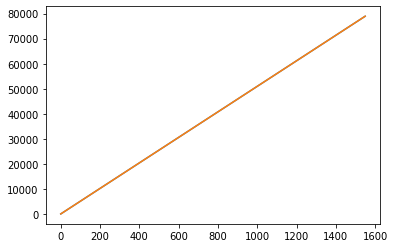

In [23]:
import matplotlib.pyplot as plt

# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [24]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

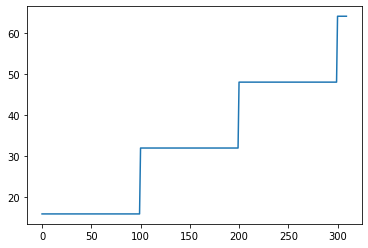

In [25]:
plt.plot(EWLVoltage[:310])

(array([   0., 1549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

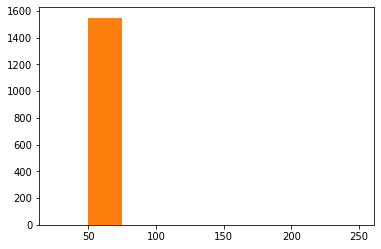

In [26]:
# Histogram of interframe lengths


#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


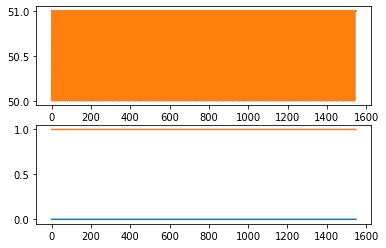

In [27]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


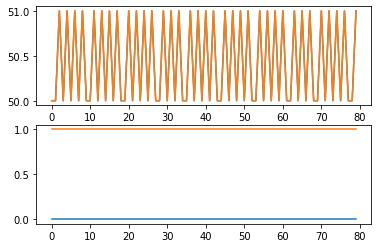

In [32]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

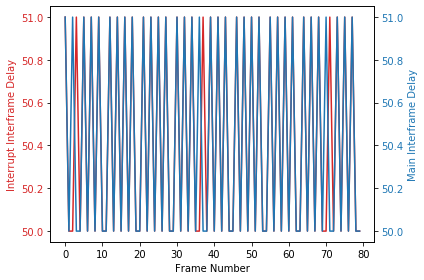

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[51 50 51 50 51 50 51 50 50 51 50 51 50 51 50 51 50 50 51 50] 
 [101, 101, 101, 101, 101, 101, 151, 151, 151, 152]


In [17]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

17805 1 1 1 0
17805 296 296
17805 1 1


In [18]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

NameError: name 'frameLengths' is not defined

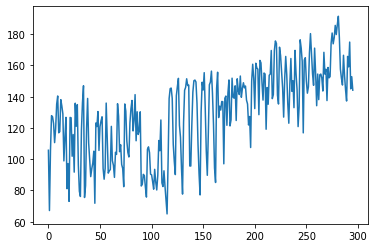

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

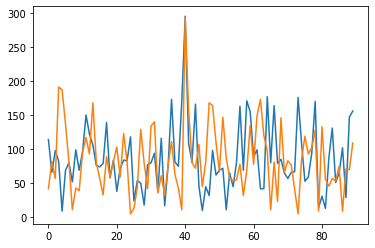

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

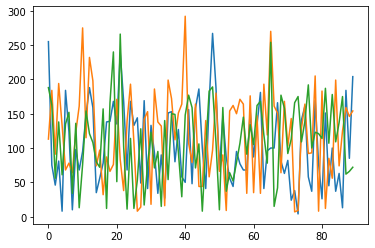

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()